# **E-Comerce Customer Churn Predict**

# **1. Business Problem Understanding**

## **Context**

Perusahaan ini adalah sebuah platform e-commerce yang melayani berbagai kategori produk, termasuk fashion, elektronik, dan kebutuhan sehari-hari. Perusahaan telah beroperasi cukup lama dan memiliki basis pelanggan yang cukup besar, sebagaimana tercermin dari data pelanggan yang menunjukkan variasi preferensi kategori belanja, serta riwayat penggunaan layanan (tenure). Dalam operasionalnya, perusahaan ini juga memiliki kebijakan cashback yang bertujuan untuk meningkatkan loyalitas pelanggan. Selain itu, data menunjukkan adanya fitur pelayanan pelanggan, seperti penanganan komplain, yang mencerminkan upaya perusahaan dalam menjaga kualitas layanan.

Namun, di tengah kompetisi industri e-commerce yang sangat ketat, perusahaan mulai menghadapi tantangan dalam mempertahankan pelanggannya. Fenomena customer churn atau berpindahnya pelanggan ke platform lain menjadi perhatian utama, karena berdampak langsung terhadap pendapatan dan keberlanjutan bisnis.

Terdapat dua cara untuk mengatasi fenomena customer churn, agar perusahaan dapat mempertahankan keuntungan. Pertama yaitu mempertahankan customer lama agar menetap (customer retentions) dan cara kedua yaitu mencari customer baru (customer acquisition). Berdasarkan statistik dari berbagai industri bisnis, hasil riset menemukan bahwa **customer acquisition memiliki biaya 5 kali lipat lebih dari customer retention.** ([*source*](https://www.huify.com/blog/acquisition-vs-retention-customer-lifetime-value))

Hal-hal yang biasanya dilakukan untuk Customer retention :

- Biaya campaign loyalitas

- Diskon khusus pelanggan

- Cashback

- Biaya email/pesan promosi

- Program loyalti

Berdasarkan event/kegiatan Customer Retention diatas, perusahaan diperkirakan mengeluarkan dana sebesar $100.000 untuk memaintain 1000 customer lama, maka :

- Customer Retention Cost :
$$
\text{Retention Cost per Customer} = \frac{100.000}{1000} = \$ 100\text{ per customer}
$$

- Customer Acquisition Cost:

$$
\text{Acquisition Cost per Customer} = \text{Retention Cost per Customer} \times 5 = \$ 500 \text{ per customer}
$$
([*Source*](https://www.clv-calculator.com/customer-costs/retention-costs-clv/retention-cost-formula/))

Dengan demikian diasumsikan untuk melakukan Customer Retention perusahaan menggunakan anggaran sebesar $100 per customer, sedangkan jika melakukan Customer Acquisition perusahaan mengeluarkan anggaran 5 kali lipat dari Customer Retention yaitu $500. 



## **Problem Statement**

Agar dapat mengatasi fenomena customer churn ini perusahaan memerlukan hal-hal berikut :
- Perusahaan perlu memiliki sistem yang dapat mengidentifikasi pelanggan yang berisiko churn secara proaktif. 
- Berdasarkan data historis yang dimiliki perusahaan perlu mengetahui faktor apa yang paling mempengaruhi customer akan melakukan churn
- Setelah mengetahui customer yang berpotensi churn perusahaan perlu mengetahui segmentasi dari customer tersebut, agar upaya pencegahaan yang dilakukan sesuai dengan karakteristik dari customer tersebut.

**Goal**

Berdasarkan permasalahan yang ada tujuan dari tujuan dari project ini adalah
- Membangun sebuah model Machine Learning agar dapat mengidentifikasi pelanggan yang berpotensi melakukan Churn
- Mengetahui fitur-fitur yang paling mempengaruhi customer churn agar dapat dilakukan tindakan untuk meminimalisir potensi churn
- Melakukan segmentasi pelanggan yang telah diprediksi churn agar tindakan pencegahaan yang dilakukan tepat sasaran

**Stake Holder**

Stakeholder adalah pihak-pihak yang terpengaruh langsung oleh hasil analisis churn, menggunakan output-nya untuk pengambilan keputusan. pada project ini stake holder utamanya adalah:
- **Marketing Team** yang akan membuat promosi/campaign sebagai upaya customer retention
- **Customer Relationship Management (CRM)** yang bertanggung jawab untuk menjaga pelanggan tetap aktif serta mengirim info promo ke pelanggan

**Analytic Approach**

Langkah yang akan dilakukan antara lain:

- Melakukan analisis eksploratif pada data untuk memahami data lebih dalam.
- Melakukan data preporcessing untuk meningkatkan kualitas input ke dalam model.
- Membangun model klasifikasi terbaik yang dipilih dengan cross validation
- Melakukan Hyperparameter Tunning untuk memaksimalkan parameter yang dimiliki model
- Melakukan identifikasi fitur-fitur yang paling mempengaruhi customer churn
- Melakukan segmentasi pelanggan dengan metode Clustering

**Metric Evaluation**

- **Target:**

    - 0 : Tidak churn / masih menjadi pelanggan aktif

    - 1 : Churn / sudah tidak menggunakan layanan


- **False Positive (FP):**

    - Model memprediksi pelanggan akan churn, padahal sebenarnya tidak.

    - **Risiko bisnis:** Perusahaan akan melakukan Customer Retention (seperti diskon, promo, atau campaign retensi) untuk pelanggan yang sebenarnya tetap loyal.

    - **Estimasi kerugian:** $100 per pelanggan.


- **False Negative (FN):**

    - Model memprediksi pelanggan akan tetap, padahal sebenarnya churn.

    - **Risiko bisnis:** Perusahaan gagal mencegah churn, beresiko kehilangan pelanggan bernilai tinggi tanpa upaya retensi. Sehingga perusahaan akan melakukan Customer Acquisition

    - **Estimasi kerugian:** $500 per pelanggan.

**Kesimpulan Evaluasi:**

- Berdasarkan kerugiannya False Negative (FN) lebih berisiko, serta dapat beresiko mengakibatkan hilangnya pelanggan loyal yang sebenarnya masih bisa dipertahankan. Namun, False Positive (FP) juga perlu dikendalikan, mengingat Customer Retention yang sebenarnya tidak perlu bisa cukup besar, dan waktu yang digunakan untuk upaya tersebut seharusnya dapat dialokasikan untuk aktivitas bisnis lainnya yang lebih efektif.

- Oleh karena itu, metrik evaluasi yang akan digunakan adalah **F2-score**, yang memberikan bobot lebih besar pada recall (mengurangi FN), tetapi tetap mempertimbangkan precision untuk mengontrol FP.


## **Data Understanding**

**Columns Descriptions**


| Kolom                         | Deskripsi                                                                 |
|------------------------------|---------------------------------------------------------------------------|
| CustomerID                   | Unique customer ID                                                        |
| Churn                        | Churn Flag                                                                |
| Tenure                       | Tenure of customer in organization                                        |
| PreferredLoginDevice         | Preferred login device of customer                                        |
| CityTier                     | City tier                                                                 |
| WarehouseToHome              | Distance in between warehouse to home of customer                         |
| PreferredPaymentMode         | Preferred payment method of customer                                      |
| Gender                       | Gender of customer                                                        |
| HourSpendOnApp              | Number of hours spend on mobile application or website                     |
| NumberOfDeviceRegistered     | Total number of devices is registered on particular customer              |
| PreferedOrderCat             | Preferred order category of customer in last month                        |
| SatisfactionScore            | Satisfactory score of customer on service                                 |
| MaritalStatus                | Marital status of customer                                                |
| NumberOfAddress              | Total number of addresses added on particular customer                    |
| Complain                     | Any complaint has been raised in last month                               |
| OrderAmountHikeFromlastYear  | Percentage increases in order from last year                              |
| CouponUsed                   | Total number of coupons used in last month                                |
| OrderCount                   | Total number of orders placed in last month                               |
| DaySinceLastOrder            | Day since last order by customer                                          |
| CashbackAmount               | Average cashback in last month  

**Note :**
- Dataset ini berisi informasi pelanggan dari sebuah platform e-commerce, di mana setiap satu baris (row) menginformasikan data historis dan behavioral dari satu pelanggan unik. 
- Salah satu fitur utama dalam dataset ini adalah variabel Churn, yang menunjukkan apakah pelanggan tersebut telah berhenti menggunakan layanan (1) atau masih aktif (0). Variabel ini menjadi target utama dalam analisis prediktif untuk memahami pola dan faktor-faktor yang berkontribusi terhadap hilangnya pelanggan.

# **2. Import Library & Load Dataset**

In [ ]:
# ============================
# Data Manipulation
# ============================
import pandas as pd
import numpy as np
import random

# ============================
# Data Visualization
# ============================
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Statistics
# ============================
from scipy.stats import normaltest, chi2_contingency

# ============================
# Data Splitting & Cross Validation
# ============================
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    KFold, 
    cross_val_score, 
    cross_validate,
    GridSearchCV,
    RandomizedSearchCV
)

# ============================
# Preprocessing
# ============================
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    MinMaxScaler,
    StandardScaler,
    RobustScaler
)
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# ============================
# Imbalanced Dataset Handling
# ============================
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as Pipeline

# ============================
# Classification Models
# ============================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ============================
# Metrics & Evaluation
# ============================
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    fbeta_score,
    make_scorer,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    roc_auc_score
)

# ============================
# Clustering
# ============================
from sklearn.cluster import KMeans

# ============================
# Deployment
# ============================
import pickle

# ============================
# Ignore Warnings
# ============================
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')


## **Dataset Informations**

In [ ]:
data = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name='E Comm')
display(data.shape, data.head())

(5630, 20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [195]:
# Menganalisis tiap kolom DataFrame:
# tampilkan tipe data,
# jumlah & persentase nilai null,
# jumlah nilai unik,
# dan sampel nilai unik (maks 36).


def describe_columns(df, sample_size=36):
    columns_to_describe = df.columns

    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)

    desc_data = []

    for col in columns_to_describe:
        try:
            nunique = df[col].nunique()
            dtype = df[col].dtype
            null_count = df[col].isna().sum()
            count = len(df[col]) - null_count
            null_pct = round((null_count / len(df[col])) * 100, 2)

            unique_values = df[col].dropna().drop_duplicates().values.tolist()
            sampled_values = np.random.choice(
                unique_values,
                size=min(len(unique_values), sample_size),
                replace=False
            )
            unique_sample = sorted(sampled_values)
        except Exception as e:
            nunique = 'Error'
            dtype = str(df[col].dtype)
            null_count = null_pct = count = 0
            unique_sample = [str(e)]

        desc_data.append([
            col, dtype, count, null_count, null_pct, nunique, unique_sample
        ])

    df_desc = pd.DataFrame(
        columns=[
            'dataFeatures', 'dataType', 'count', 'null', 'nullPercent',
            'unique', f'unique (max {sample_size} values)'
        ],
        data=desc_data
    )

    display(df_desc)

    # Reset options
    pd.reset_option('display.max_colwidth')
    pd.reset_option('display.max_rows')

In [196]:
describe_columns(data)

,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,CustomerID,int64,5630,0,0.00,5630,"[50094, 50330, 50373, 50869, 51501, 51654, 51946, 52031, 52365, 52397, 52533, 52836, 53074, 53208, 53291, 53304, 53458, 53490, 53539, 53561, 53744, 53841, 54034, 54035, 54433, 54547, 54593, 54635, 54674, 54721, 55110, 55207, 55227, 55414, 55530, 55590]"
1,Churn,int64,5630,0,0.00,2,"[0, 1]"
2,Tenure,float64,5366,264,4.69,36,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 50.0, 51.0, 60.0, 61.0]"
3,PreferredLoginDevice,object,5630,0,0.00,3,"[Computer, Mobile Phone, Phone]"
4,CityTier,int64,5630,0,0.00,3,"[1, 2, 3]"
5,WarehouseToHome,float64,5379,251,4.46,34,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 126.0, 127.0]"
6,PreferredPaymentMode,object,5630,0,0.00,7,"[CC, COD, Cash on Delivery, Credit Card, Debit Card, E wallet, UPI]"
7,Gender,object,5630,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,5375,255,4.53,6,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,5630,0,0.00,6,"[1, 2, 3, 4, 5, 6]"


Insight :
- Dataset terdiri dari 5630 baris dan 20 kolom
- Terdapat missing value pada kolom `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`,`CouponUsed`,`OrderCount` dan `DaySinceLastOrder`, kolom dengan missing value ini akan di handle dengan Imputer pada Data Preprocessing

In [197]:
data.drop(columns='CustomerID').duplicated().sum()

np.int64(556)

Insight :
- Terdapat 556 data duplicate pada dataset, data duplicate dapat mempengaruhi prediksi Machine Learning dengan demikian akan di drop.

## **Data Cleaning**

### **Drop Columns & Duplicate**

In [198]:
df = data.copy()

In [199]:
duplicates_mask = df.drop(columns='CustomerID').duplicated()
duplicated_index = df[duplicates_mask].index.tolist()

print(f'Jumlah duplikasi: {len(duplicated_index)} baris')

Jumlah duplikasi: 556 baris


In [200]:
df = df.drop(index=duplicated_index)
df.drop(columns='CustomerID').duplicated().sum()

np.int64(0)

Kolom `CustomerID` terdiri dari data yang seluruhnya unik, jadi tidak akan bisa dianalisa serta akan mempengaruhi prediksi machine learning karena tidak memiliki pola. dengan demikian lebih baik di drop. kemudian data duplicate juga di drop karena akan mempengaruhi prediksi dari machine learning juga.

### **Unique Value**

**Numerical Columns**

In [201]:
listItem = []
for col in df.drop(columns='CustomerID').describe().columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].min(), df[col].max()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'minvalue', 'maxvalue'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,minvalue,maxvalue
0,Churn,int64,0,0.00,2,0.0,1.00
1,Tenure,float64,231,4.55,36,0.0,61.00
2,CityTier,int64,0,0.00,3,1.0,3.00
3,WarehouseToHome,float64,221,4.36,34,5.0,127.00
4,HourSpendOnApp,float64,230,4.53,6,0.0,5.00
5,NumberOfDeviceRegistered,int64,0,0.00,6,1.0,6.00
6,SatisfactionScore,int64,0,0.00,5,1.0,5.00
7,NumberOfAddress,int64,0,0.00,15,1.0,22.00
8,Complain,int64,0,0.00,2,0.0,1.00
9,OrderAmountHikeFromlastYear,float64,252,4.97,16,11.0,26.00


In [202]:
describe_columns(df.select_dtypes(exclude=[np.number]))

,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,PreferredLoginDevice,object,5074,0,0.0,3,"[Computer, Mobile Phone, Phone]"
1,PreferredPaymentMode,object,5074,0,0.0,7,"[CC, COD, Cash on Delivery, Credit Card, Debit Card, E wallet, UPI]"
2,Gender,object,5074,0,0.0,2,"[Female, Male]"
3,PreferedOrderCat,object,5074,0,0.0,6,"[Fashion, Grocery, Laptop & Accessory, Mobile, Mobile Phone, Others]"
4,MaritalStatus,object,5074,0,0.0,3,"[Divorced, Married, Single]"


Insight:
- Terlihat bahwa seluruh kolom sesuai dengan tipe datanya
- Pada bagian min value terlihat aman tidak ada data bernilai negatif, namun beberapa kolom memiliki max value yang cukup tinggi seperti `Tenure` dan `WarehouseToHome` untuk lebih jelasnya data akan divisualisasikan pada bagian EDA untuk melihat data tersebut Outlier atau Tidak

**Categorical Columns**

In [203]:
describe_columns(df.select_dtypes(exclude=[np.number]))


,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,PreferredLoginDevice,object,5074,0,0.0,3,"[Computer, Mobile Phone, Phone]"
1,PreferredPaymentMode,object,5074,0,0.0,7,"[CC, COD, Cash on Delivery, Credit Card, Debit Card, E wallet, UPI]"
2,Gender,object,5074,0,0.0,2,"[Female, Male]"
3,PreferedOrderCat,object,5074,0,0.0,6,"[Fashion, Grocery, Laptop & Accessory, Mobile, Mobile Phone, Others]"
4,MaritalStatus,object,5074,0,0.0,3,"[Divorced, Married, Single]"


Insight :
- Terdapat beberapa data yang memiliki arti yang sama namun memiliki cara penulisan berbeda diantaranya : 
    - Pada kolom `PreferredLoginDevice` terdapat kategori Mobile Phone dan Phone
    - Pada kolom `PreferredPaymentMode` terdapat kategori Cash on Delivery dan COD 
    - Pada kolom `PreferedOrderCat` terdapat kategori Phone dan Mobile Phone

**Normalizations**

In [ ]:
print('Before Normalization:')
describe_columns(df[['PreferredPaymentMode', 'PreferredLoginDevice', 'PreferedOrderCat']], sample_size=36)

# Normalization
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'Cash on Delivery': 'COD',
    'Credit Card': 'CC'
})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

print('\nAfter Normalization:')
describe_columns(df[['PreferredPaymentMode', 'PreferredLoginDevice', 'PreferedOrderCat']], sample_size=36)


Before Normalization:


,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,PreferredPaymentMode,object,5074,0,0.0,7,"[CC, COD, Cash on Delivery, Credit Card, Debit Card, E wallet, UPI]"
1,PreferredLoginDevice,object,5074,0,0.0,3,"[Computer, Mobile Phone, Phone]"
2,PreferedOrderCat,object,5074,0,0.0,6,"[Fashion, Grocery, Laptop & Accessory, Mobile, Mobile Phone, Others]"



After Normalization:


,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,PreferredPaymentMode,object,5074,0,0.0,5,"[Cash on Delivery, Credit Card, Debit Card, E wallet, UPI]"
1,PreferredLoginDevice,object,5074,0,0.0,2,"[Computer, Mobile Phone]"
2,PreferedOrderCat,object,5074,0,0.0,5,"[Fashion, Grocery, Laptop & Accessory, Mobile Phone, Others]"


In [13]:
describe_columns(df.drop(columns=df.describe().columns))

,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,PreferredLoginDevice,object,5074,0,0.0,2,"[Computer, Mobile Phone]"
1,PreferredPaymentMode,object,5074,0,0.0,5,"[CC, COD, Debit Card, E wallet, UPI]"
2,Gender,object,5074,0,0.0,2,"[Female, Male]"
3,PreferedOrderCat,object,5074,0,0.0,5,"[Fashion, Grocery, Laptop & Accessory, Mobile Phone, Others]"
4,MaritalStatus,object,5074,0,0.0,3,"[Divorced, Married, Single]"


Insight:
- Dengan demikian data sudah tidak memiliki duplicate dan telah dinormalisasi. data masih memiliki missing value yang nanti akan diatasi dengan Imputer serta akan dicek Outliernya pada Bagian EDA (Explonatory Data Analyst)

# **3. EDA**

In [14]:
# Mengelompokkan kolom sesuai dengan tipe datanya

cat_cols = df.select_dtypes(include=['object']).columns
num_cols_ = pd.Index([col for col in df.columns if col not in cat_cols])
num_cols = pd.Index([col for col in df.drop(columns=['CustomerID', 'Churn']).columns if col not in cat_cols])
nan_cols = pd.Index([col for col in df.columns if df[col].isna().sum() > 0])

print('Kolom-kolom kategorikal:\n',', '.join(cat_cols) + '.')
print('Kolom-kolom numerikal:\n', ', '.join(num_cols) + '.')

Kolom-kolom kategorikal:
 PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat, MaritalStatus.
Kolom-kolom numerikal:
 Tenure, CityTier, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount.


In [15]:
print('Numeric Columns:')
display(describe_columns(df[num_cols_]))

Numeric Columns:


,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,CustomerID,int64,5074,0,0.00,5074,"[50260, 50312, 50398, 50486, 50497, 50520, 50705, 50878, 50922, 51055, 51073, 51086, 51173, 51241, 51246, 51301, 51540, 51766, 51836, 52019, 52093, 52167, 52305, 52746, 53283, 53349, 53645, 53741, 53996, 54100, 54444, 54537, 54786, 54800, 55165, 55465]"
1,Churn,int64,5074,0,0.00,2,"[0, 1]"
2,Tenure,float64,4843,231,4.55,36,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 50.0, 51.0, 60.0, 61.0]"
3,CityTier,int64,5074,0,0.00,3,"[1, 2, 3]"
4,WarehouseToHome,float64,4853,221,4.36,34,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 126.0, 127.0]"
5,HourSpendOnApp,float64,4844,230,4.53,6,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
6,NumberOfDeviceRegistered,int64,5074,0,0.00,6,"[1, 2, 3, 4, 5, 6]"
7,SatisfactionScore,int64,5074,0,0.00,5,"[1, 2, 3, 4, 5]"
8,NumberOfAddress,int64,5074,0,0.00,15,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 19, 20, 21, 22]"
9,Complain,int64,5074,0,0.00,2,"[0, 1]"


None

Insight:
- Pada kolom-kolom numerik terdapat beberapa NaN value

In [16]:
print('Categorical Columns:')
display(describe_columns(df[cat_cols]))

Categorical Columns:


,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,PreferredLoginDevice,object,5074,0,0.0,2,"[Computer, Mobile Phone]"
1,PreferredPaymentMode,object,5074,0,0.0,5,"[CC, COD, Debit Card, E wallet, UPI]"
2,Gender,object,5074,0,0.0,2,"[Female, Male]"
3,PreferedOrderCat,object,5074,0,0.0,5,"[Fashion, Grocery, Laptop & Accessory, Mobile Phone, Others]"
4,MaritalStatus,object,5074,0,0.0,3,"[Divorced, Married, Single]"


None

Insight:
- Pada kolom-kolom kategorik tidak terdapat NaN value

In [17]:
# Salin data
df_imputed = df.copy()

# Imputasi setiap kolom numerik secara terpisah dengan nilai minimum/maksimum masing-masing
for col in num_cols_:
    # Ambil nilai minimum dan maksimum dari data asli (yang tidak missing)
    min_val = df[col].min()
    max_val = df[col].max()

    # Buat imputer dengan batas nilai minimum dan maksimum
    imputer = IterativeImputer(min_value=min_val, max_value=max_val, random_state=0)

    # Ubah ke bentuk 2D (dibutuhkan oleh sklearn)
    col_array = df[[col]].values
    df_imputed[col] = imputer.fit_transform(col_array)

# Proses setelah imputasi
for col in num_cols:
    if col == 'CashbackAmount':
        # Konversi ke numerik dan bulatkan ke 2 desimal
        df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce').round(2)
    else:
        # Bulatkan dan ubah ke tipe integer
        df_imputed[col] = df_imputed[col].round().astype('int64')

# Kembalikan tipe data untuk kolom CustomerID dan Churn
df_imputed['CustomerID'] = df_imputed['CustomerID'].astype('int64').astype('object')
df_imputed['Churn'] = df_imputed['Churn'].astype('int64')

# Tampilkan deskripsi data
display(describe_columns(df_imputed))

,dataFeatures,dataType,count,null,nullPercent,unique,unique (max 36 values)
0,CustomerID,object,5074,0,0.0,5074,"[50228, 50347, 50442, 50517, 50522, 50710, 50739, 50788, 50803, 50979, 51168, 51206, 51419, 51557, 51970, 52121, 52197, 52215, 52405, 52458, 52655, 53236, 53776, 53790, 53903, 53923, 54004, 54302, 54320, 54327, 54420, 54432, 54722, 54806, 55340, 55438]"
1,Churn,int64,5074,0,0.0,2,"[0, 1]"
2,Tenure,int64,5074,0,0.0,36,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 50, 51, 60, 61]"
3,PreferredLoginDevice,object,5074,0,0.0,2,"[Computer, Mobile Phone]"
4,CityTier,int64,5074,0,0.0,3,"[1, 2, 3]"
5,WarehouseToHome,int64,5074,0,0.0,34,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 126, 127]"
6,PreferredPaymentMode,object,5074,0,0.0,5,"[CC, COD, Debit Card, E wallet, UPI]"
7,Gender,object,5074,0,0.0,2,"[Female, Male]"
8,HourSpendOnApp,int64,5074,0,0.0,6,"[0, 1, 2, 3, 4, 5]"
9,NumberOfDeviceRegistered,int64,5074,0,0.0,6,"[1, 2, 3, 4, 5, 6]"


None

Insight:
- NaN value sudah diisi menggunakan IterativeImputer dan sudah tidak ada NaN value di setiap kolom

In [18]:
duplicates_mask = df_imputed.drop(columns='CustomerID').duplicated()
duplicated_index = df_imputed[duplicates_mask].index.tolist()

print(f'Jumlah duplikasi: {len(duplicated_index)} baris')

Jumlah duplikasi: 2 baris


In [19]:
df_imputed['Tenure'].unique()

array([ 4, 10,  0, 13, 11,  9, 19, 20, 14,  8, 18,  5,  2, 30,  1, 23,  3,
       29,  6, 26, 28,  7, 24, 25, 15, 22, 27, 16, 12, 21, 17, 50, 60, 31,
       51, 61])

In [20]:
df_imputed = df_imputed.drop(index=duplicated_index)
df_imputed.drop(columns='CustomerID').duplicated().sum()

np.int64(0)

In [21]:
df_imputed['Tenure'].unique()

array([ 4, 10,  0, 13, 11,  9, 19, 20, 14,  8, 18,  5,  2, 30,  1, 23,  3,
       29,  6, 26, 28,  7, 24, 25, 15, 22, 27, 16, 12, 21, 17, 50, 60, 31,
       51, 61])

Insight:
- Duplikasi baris sudah berhasil didrop

In [22]:
df_imputed['Churn'].value_counts()

Churn
0    4231
1     841
Name: count, dtype: int64

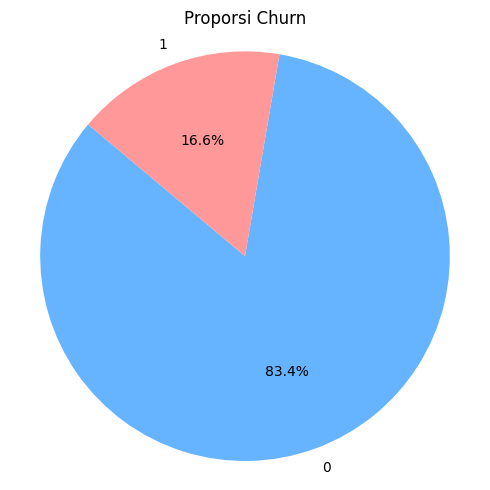

In [23]:
class_counts = df_imputed['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Proporsi Churn')
plt.axis('equal')  # Biar pie-nya bulat
plt.tight_layout()
plt.show()

## **Numerical Data Distribution**

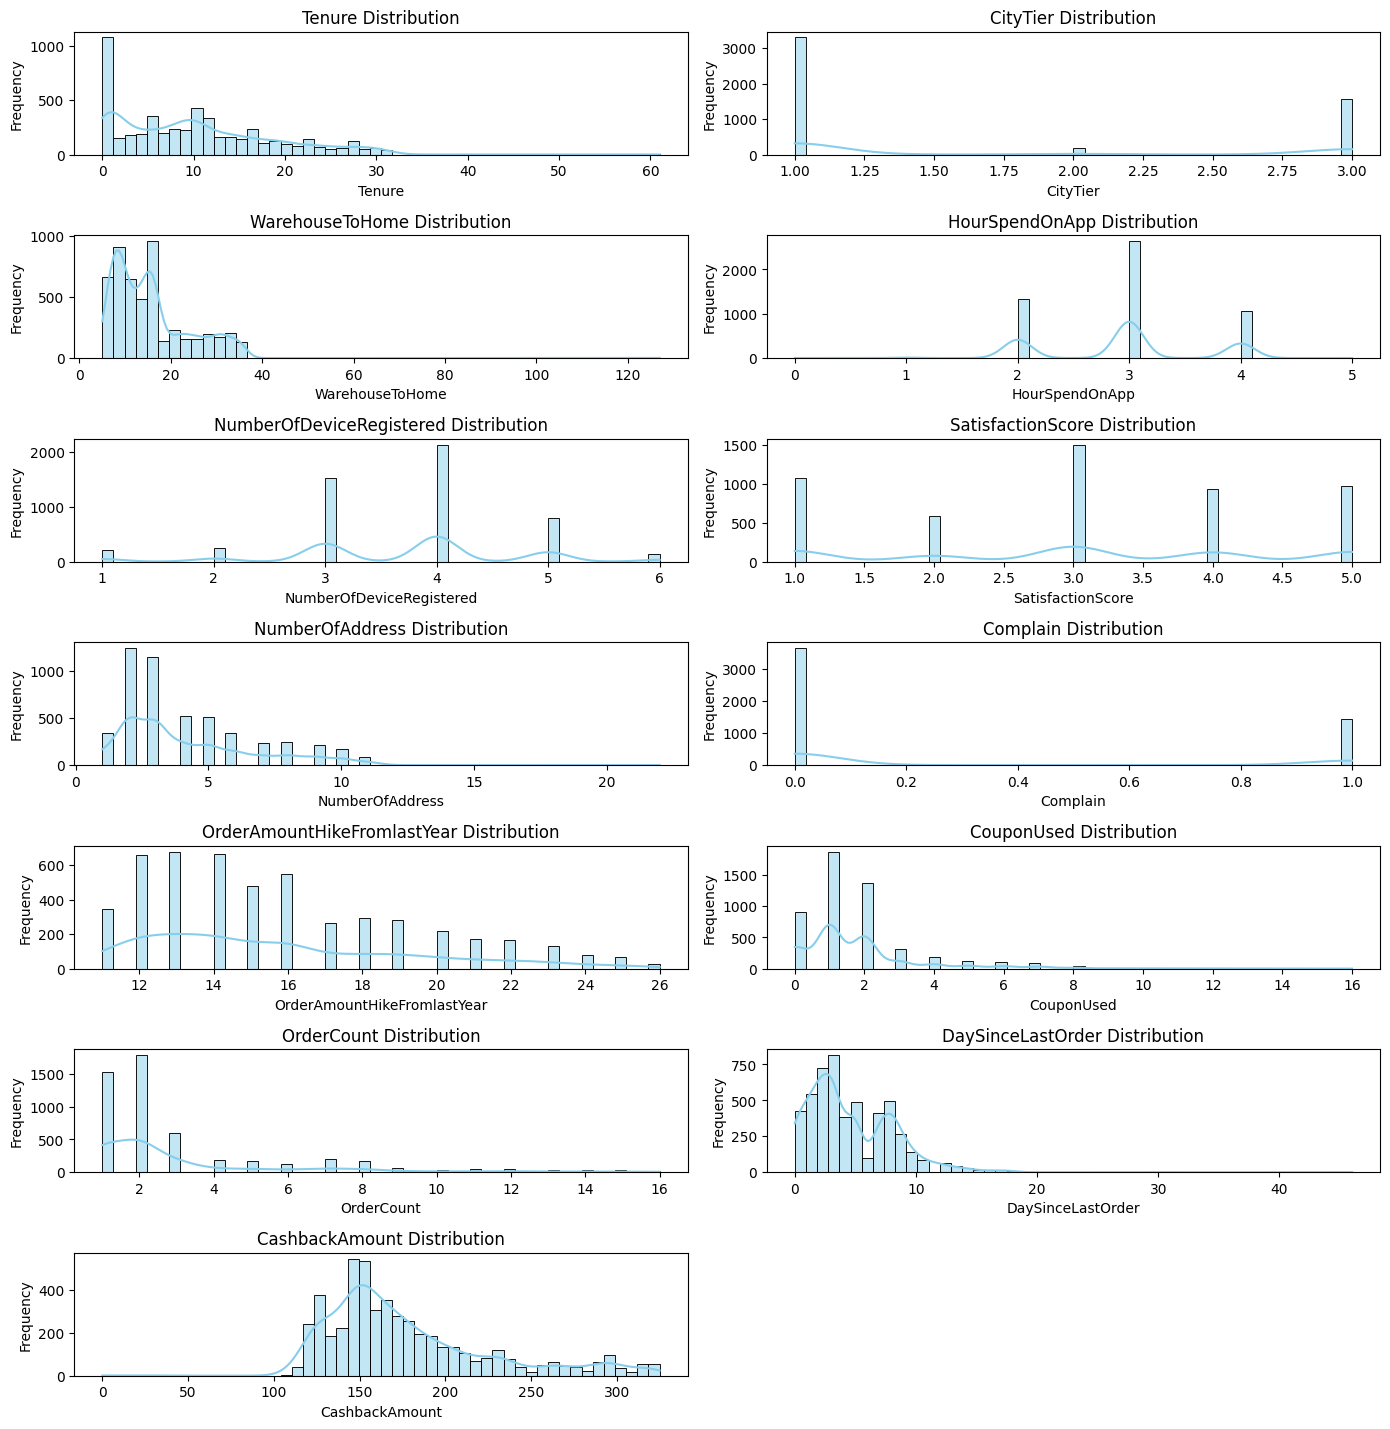

In [24]:
plt.figure(figsize=(14, 16))
for i, data in enumerate(num_cols):
    plt.subplot(8, 2, i+1)
    sns.histplot(df_imputed[data], kde=True, bins=50, color='skyblue')
    plt.title(f'{data} Distribution')
    plt.xlabel(data)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Untuk membuktikan distribusi data yang lebih jelas maka akan diuji secara statistik. Data akan diuji dengan metode D'Agostino and Pearson's Test karena merupakan sample besar (n>50)

Hypotesis:
- H0: Data terdistribusi normal
- H1: Data tidak terdistribusi normal

Kesimpulan:
- pvalue>0.05-->gagal menolak H0-->Data terdistribusi normal
- pvalue<0.05-->berhasil menolak H0-->Data tidak terdistribusi normal

In [25]:
cart={'Data':[],
      'P-value':[],
      'Distribusi':[]}

for col in num_cols:
    stats, pvalue=normaltest(df_imputed[col])
    if pvalue>=0.05:
        status='normal'
        cart['Data'].append(col)
        cart['P-value'].append(pvalue)
        cart['Distribusi'].append(status)

    else:
        status='Tidak normal'
        cart['Data'].append(col)
        cart['P-value'].append(pvalue)
        cart['Distribusi'].append(status)

datanorm=pd.DataFrame(cart)
datanorm=datanorm.sort_values(by='P-value', ascending=False)
datanorm

,Data,P-value,Distribusi
3,HourSpendOnApp,1.138827e-27,Tidak normal
4,NumberOfDeviceRegistered,1.919362e-37,Tidak normal
0,Tenure,7.070765e-89,Tidak normal
8,OrderAmountHikeFromlastYear,7.728120e-94,Tidak normal
6,NumberOfAddress,3.005230e-177,Tidak normal
12,CashbackAmount,4.539070e-178,Tidak normal
11,DaySinceLastOrder,2.335464e-296,Tidak normal
1,CityTier,0.000000e+00,Tidak normal
2,WarehouseToHome,0.000000e+00,Tidak normal
7,Complain,0.000000e+00,Tidak normal


## **Outliers**

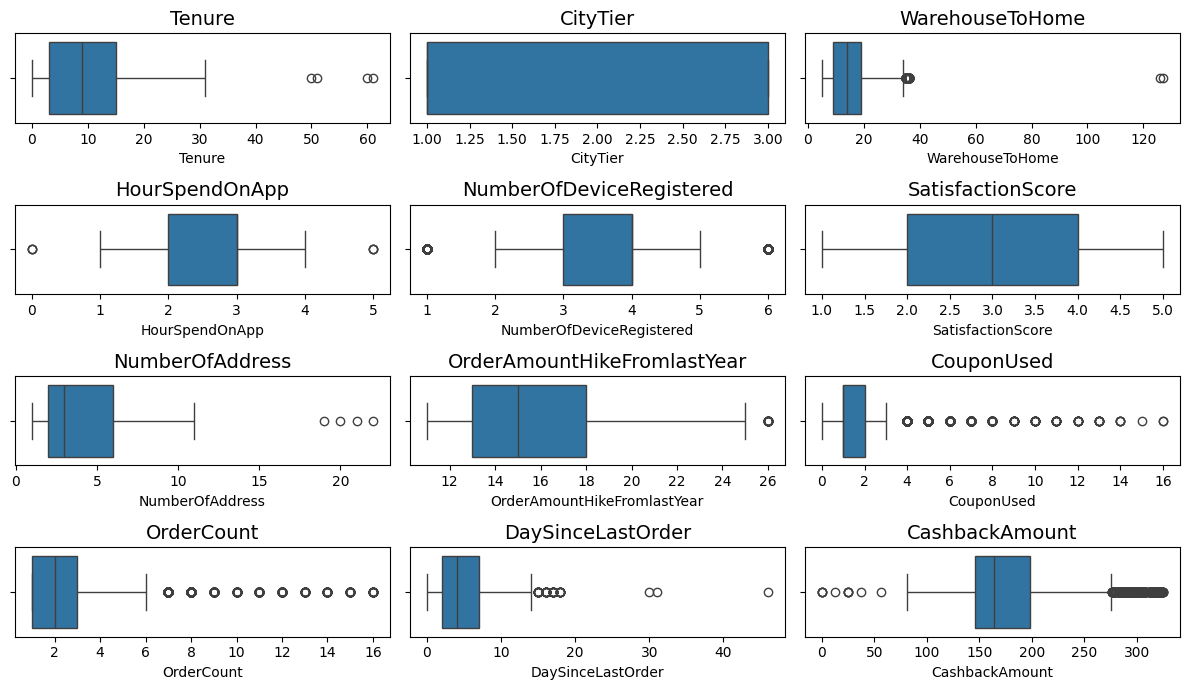

In [26]:
# Ambil fitur numerik dengan >2 nilai unik
num_features = [col for col in num_cols if df[col].nunique() > 2]

# Tentukan ukuran grid otomatis
n_cols = 3
n_rows = int(np.ceil(len(num_features) / n_cols))

# Buat figure
plt.figure(figsize=(4 * n_cols, 1.75 * n_rows), facecolor='white')

# Plot boxplot untuk tiap fitur
for idx, feature in enumerate(num_features, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(data=df_imputed, x=feature)
    plt.title(feature, fontsize=14)

plt.tight_layout()
plt.show()

Insight :

1. **Tenure**

   * Ada **outlier ekstrem** di atas 40 bulan (mungkin pelanggan lama yang sangat jarang).
   * Mayoritas pelanggan memiliki tenure < 20 bulan.

2. **WarehouseToHome**

   * Ada nilai ekstrim > 100, kemungkinan error input atau kasus sangat langka.
   * Mayoritas waktu pengiriman berada < 30.

3. **NumberOfAddress**

   * Outlier cukup signifikan, ada pelanggan dengan hingga > 20 alamat.
   * Distribusi sangat miring ke kiri.

4. **CouponUsed**

   * Banyak outlier di atas 4 kupon digunakan.
   * Sebagian besar pengguna hanya memakai sedikit kupon.

5. **OrderCount**

   * Outlier hingga > 15 order.
   * Sebagian besar pelanggan memesan < 5 kali.

6. **DaySinceLastOrder**

   * Ada pelanggan yang tidak order > 40 hari.
   * Sebagian besar masih aktif (< 10 hari).

7. **CashbackAmount**

   * Banyak **outlier ke kanan**, menunjukkan adanya pelanggan yang mendapat cashback besar (> 300).
   * Distribusi miring kanan (right-skewed).

## **Categorical Data Distribution**

In [27]:
cat_cols

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

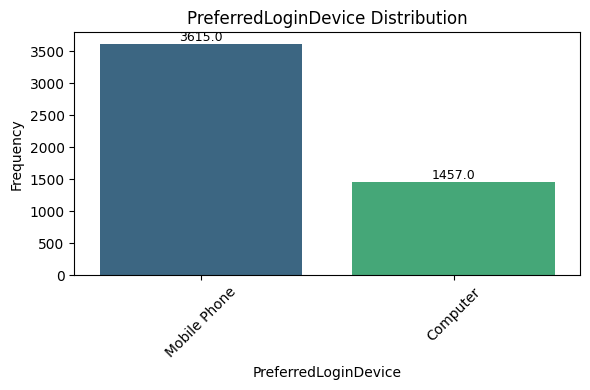

In [28]:
col = 'PreferredLoginDevice'
order = df_imputed[col].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_imputed, x=col, order=order, palette='viridis')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black')

plt.title(f'{col} Distribution')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Corelations**

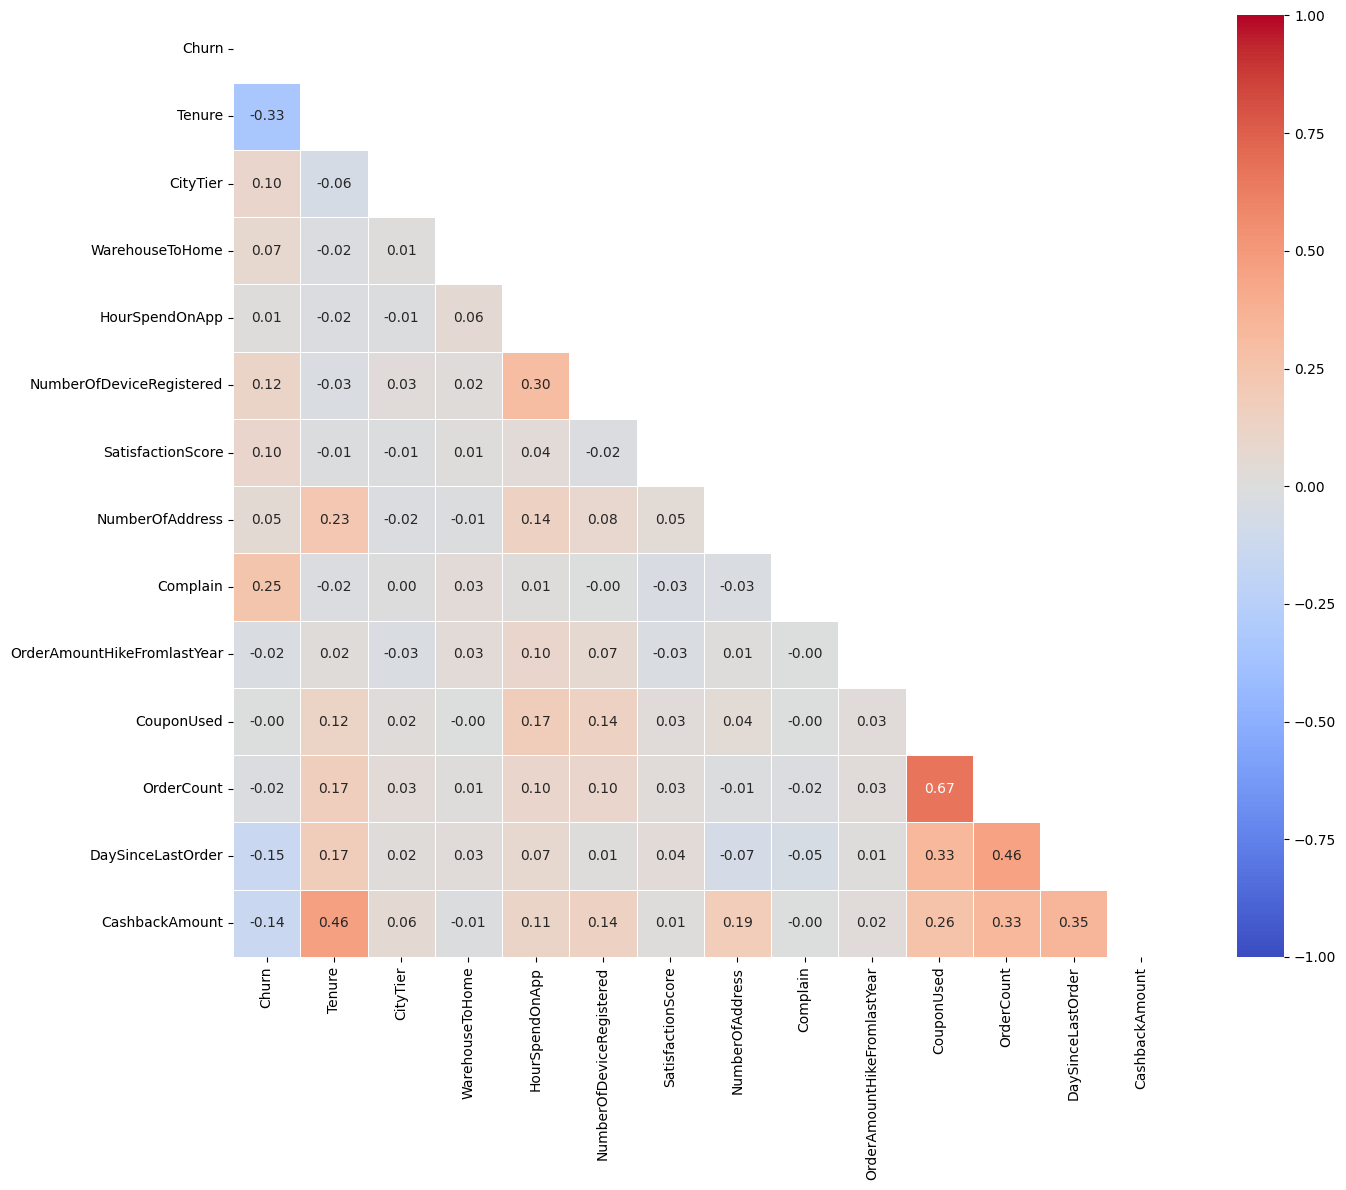

In [29]:
# Hitung korelasi
corr = df_imputed[['Churn'] + num_cols.tolist()].corr()

# Buat mask untuk segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap dengan segitiga bawah
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=.5
)
plt.tight_layout()
plt.show()


Insight:
- `Tenure` (r = -0.33)
    - Korelasi negatif paling kuat terhadap Churn.<br>
    Interpretasi: Semakin lama pelanggan bertahan (Tenure tinggi), semakin kecil kemungkinan mereka untuk churn.
- `Complain` (r = 0.25)
    - Korelasi positif sedang terhadap Churn.<br>
    Interpretasi: Pelanggan yang mengajukan komplain cenderung memiliki risiko churn lebih tinggi.

In [30]:
# Tentukan batas minimal dan maksimal cashback
min_val = df_imputed['CashbackAmount'].min()
max_val = df_imputed['CashbackAmount'].max()

bin_size = 50
bins = list(range(int(min_val // bin_size) * bin_size, int(max_val // bin_size + 2) * bin_size, bin_size))

# Buat label untuk setiap bin
labels = [f'{bins[i]} - {bins[i+1]-1}' for i in range(len(bins)-1)]

# Binning kolom CashbackAmount
df_imputed['CashbackBin'] = pd.cut(df_imputed['CashbackAmount'], bins=bins, labels=labels, include_lowest=True)

# Contoh hasil
display(df_imputed[['CashbackAmount', 'CashbackBin']].head())


,CashbackAmount,CashbackBin
0,159.93,150 - 199
1,120.90,100 - 149
2,120.28,100 - 149
3,134.07,100 - 149
4,129.60,100 - 149


In [31]:
# Contoh hasil
display(df_imputed[['CashbackAmount', 'CashbackBin']].sample(5))

,CashbackAmount,CashbackBin
3463,213.58,200 - 249
1593,139.20,100 - 149
4715,147.97,100 - 149
3026,146.19,100 - 149
411,154.05,150 - 199


# **Data Analytics**

## **Melihat Korelasi Fitur**

### **Korelasi Data numerical Terhadap Target**

Untuk melihat kolom mana yang paling mempengaruhi customer churn disini kami akan memcoba untuk melakukan uji korelasi kolom numerik terhadap churn. Berhubung distribusi data tidak normal, maka disini kami akan melakukan uji korelasi Pearson.

Secara statistik nilai korelasi dapat digolongkan menjadi 5 bagian sebagai berikut :
- 0 - 0.2   : very weak
- 0.2 - 0.4 : weak
- 0.4 - 0.6 : moderate
- 0.6 - 0.9 : strong
- 0.9 - 1   : very strong

In [32]:
# Hitung korelasi terhadap churn
correlation = df_imputed.corr(numeric_only=True, method='pearson')['Churn'].sort_values(ascending=False).drop('Churn')

correlation

Complain                       0.248656
NumberOfDeviceRegistered       0.116669
SatisfactionScore              0.101015
CityTier                       0.098047
WarehouseToHome                0.071100
NumberOfAddress                0.052081
HourSpendOnApp                 0.013395
CouponUsed                    -0.004302
OrderCount                    -0.021120
OrderAmountHikeFromlastYear   -0.023803
CashbackAmount                -0.143114
DaySinceLastOrder             -0.146567
Tenure                        -0.329785
Name: Churn, dtype: float64

Disini terlihat korelasi dari masing-masing kolom terhadap churn berada pada rentang -0.34 hingga 0.24. Nilai negatif atau positif hanya digunakan untuk mengetahui arah dari korelasinya bukan kekuatan dari korelasinya. Dengan demikian disini nilai korelasinya akan saya buat absolut untuk memperjelas urutannya.

In [33]:
correlation=correlation.reset_index()
correlation['Churn']=correlation['Churn'].abs()
correlation=correlation.sort_values('Churn', ascending=False)
correlation

,index,Churn
12,Tenure,0.329785
0,Complain,0.248656
11,DaySinceLastOrder,0.146567
10,CashbackAmount,0.143114
1,NumberOfDeviceRegistered,0.116669
2,SatisfactionScore,0.101015
3,CityTier,0.098047
4,WarehouseToHome,0.071100
5,NumberOfAddress,0.052081
9,OrderAmountHikeFromlastYear,0.023803


Setelah dibuat menjadi absolut terlihat bahwa secara statistik fitur dengan korelasi terkuat terhadapa churn adalah `Tenure`, sedangkan yang paling lemah adalah `CouponUsed`

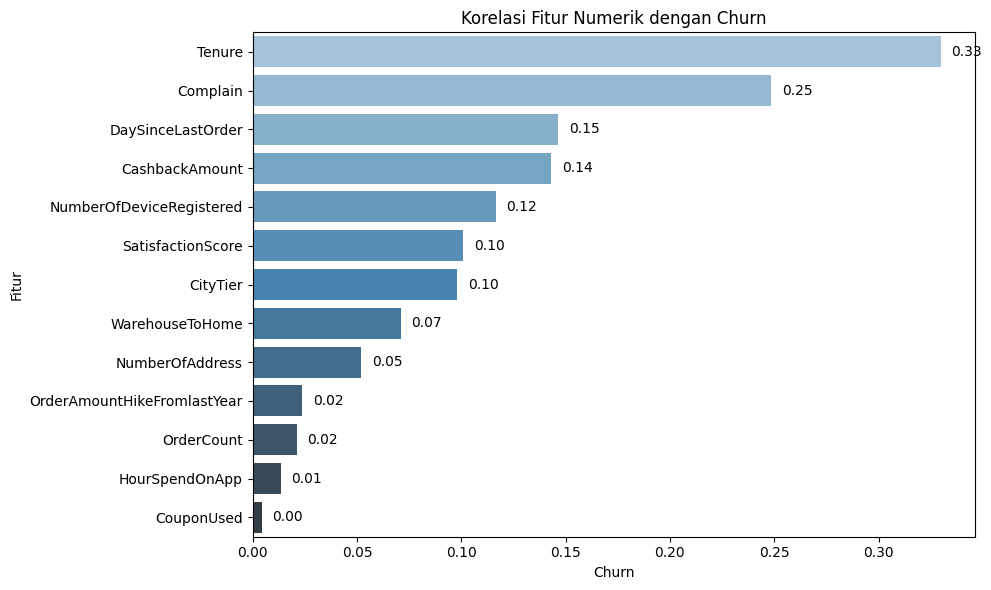

In [34]:
# Visualisasikan
plt.figure(figsize=(10,6))
ax = sns.barplot(x=correlation['Churn'], y=correlation['index'], palette='Blues_d')
plt.title('Korelasi Fitur Numerik dengan Churn')

# Tambahkan anotasi pada setiap bar
for i in range(len(correlation)):
    value = correlation['Churn'].iloc[i]
    label = correlation['index'].iloc[i]
    ax.text(value + 0.005, i, f'{value:.2f}', color='black', va='center')

plt.xlabel('Churn')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

Menganalisa prilaku customer (Customer Behaviour) merupakan sebuah analisa di bidang psikologi manusia, disini kami menemukan bahwa sumber yang mengatakan bahwa pedoman nilai korelasi harus disesuaikan dengan bidangnya. Dimana pada bidang psikologi berlaku aturan sebagai berikut : ([*source*](https://www.researchgate.net/publication/349082997_Empirically_derived_guidelines_for_effect_size_interpretation_in_social_psychology))

- r < 0.20 = Korelasi Kecil

- r 0.20–0.30 = Korelasi sedang

- r > 0.30 = Korelasi Kuat

Dengan demikian `Complain` dan `Tenure` dapat dianggap sebagai fitur yang berkorelasi sedang hingga kuat

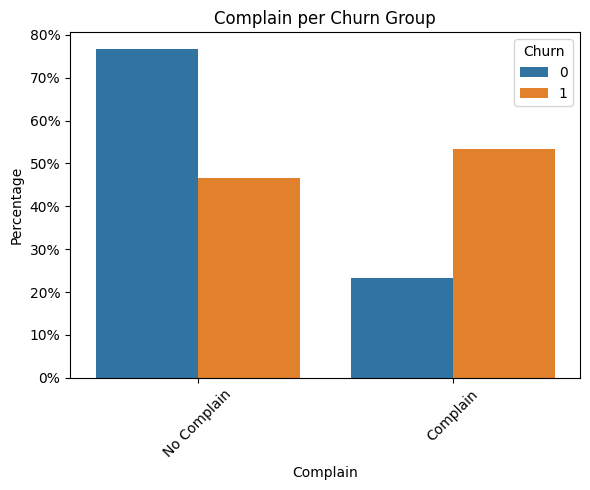

In [35]:
# Hitung proporsi berdasarkan Churn
percent_df_complain = (
    df_imputed.groupby('Churn')['Complain']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Ubah nilai 0/1 menjadi label
percent_df_complain['Complain'] = percent_df_complain['Complain'].map({
    0: 'No Complain',
    1: 'Complain'
})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    data=percent_df_complain,
    x='Complain',
    y='percentage',
    hue='Churn'
)

plt.title('Complain per Churn Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


Insight : 
- Customer yang tidak `Complain` cenderung untuk tidak `churn`
- Customer yang `Complain` cenderung untuk `churn`

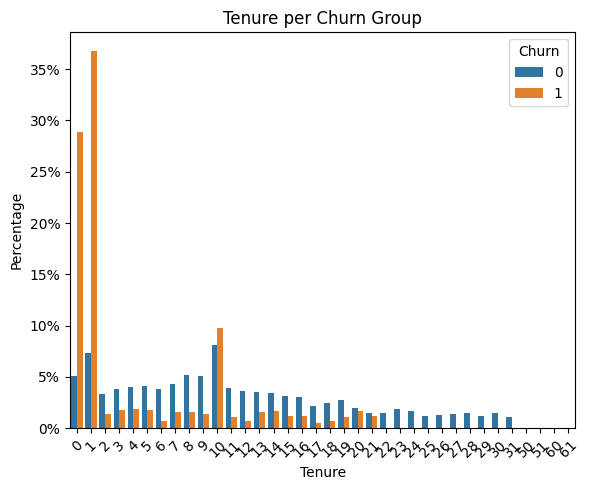

In [36]:
# Hitung proporsi berdasarkan Churn
percent_df_tenure = (
    df_imputed.groupby('Churn')['Tenure']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    data=percent_df_tenure,
    x='Tenure',
    y='percentage',
    hue='Churn'
)

plt.title('Tenure per Churn Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


Insight :
- Customer dengan nilai `Tenure` `0`, `1`, `10` memiliki kecenderungan untuk `Churn``
- Selebihnya Customer lebih memilki kecenderungan untuk **tidak** `Churn`

### **Korelasi Fitur Kategorikal Terhadap Churn**

Disini kami akan menggunakan metode Cramers V untuk mengetahui besar korelasi antara fitur kategorikal terhadap target. Cramers V adalah versi skala dari Chi-Square karena ia mengambil hasil dari Chi-Square test dan mengubahnya menjadi angka terstandarisasi (antara 0 sampai 1) yang mewakili kekuatan hubungan antar dua variabel kategorikal. untuk penggolongan nilai korelasinya sama dengan korelasi numerical dimana :

- r < 0.20 = Korelasi Kecil

- r 0.20–0.30 = Korelasi sedang

- r > 0.30 = Korelasi Kuat

In [37]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

In [38]:
# Ambil semua kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

# Hitung korelasi terhadap Churn
results = {}
for col in categorical_cols:
    results[col] = cramers_v(df[col], df['Churn'])

# Ubah ke dataframe dan urutkan
cramer_df = pd.DataFrame.from_dict(results, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values(by='CramersV', ascending=False)
print(cramer_df)

                      CramersV
PreferedOrderCat      0.212350
MaritalStatus         0.184016
PreferredPaymentMode  0.101233
PreferredLoginDevice  0.050380
Gender                0.028465


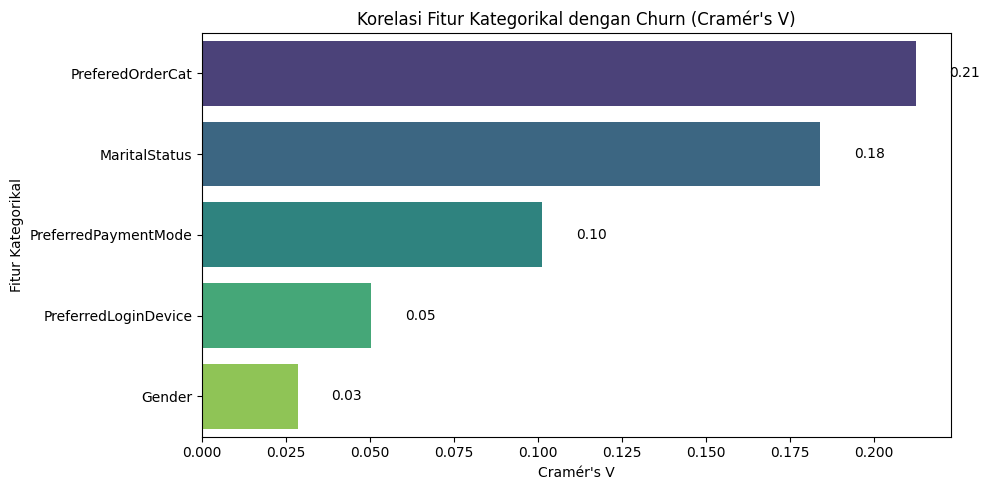

In [39]:
# Visualisasi dengan anotasi
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=cramer_df['CramersV'], y=cramer_df.index, palette='viridis')
plt.title("Korelasi Fitur Kategorikal dengan Churn (Cramér's V)")
plt.xlabel("Cramér's V")
plt.ylabel("Fitur Kategorikal")

# Tambahkan anotasi angka Cramer's V di ujung bar
for i in range(len(cramer_df)):
    value = cramer_df['CramersV'].iloc[i]
    ax.text(value + 0.01, i, f'{value:.2f}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

Disini dapat kita lihat bahwa fitur `PreferedOrderCat` memiliki korelasi paling tinggi yaitu 0.21 dimana nilai korelasi ini tergolong sedang. sedangkan fitur lainnya memiliki korelasi yang kecil.

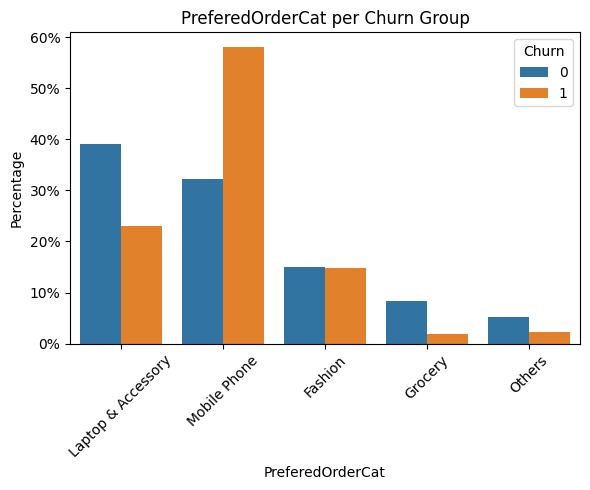

In [40]:
# Hitung proporsi berdasarkan Churn
percent_df_PreferedOrderCat = (
    df_imputed.groupby('Churn')['PreferedOrderCat']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    data=percent_df_PreferedOrderCat,
    x='PreferedOrderCat',
    y='percentage',
    hue='Churn'
)

plt.title('PreferedOrderCat per Churn Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


Insight:
- Customer dengan `PreferedOrderCat` `Mobile Phone` ternyata memiliki kecenderungan untuk `Churn`

### **Analisa Customer Behaviour**

Setelah mengetahui fitur-fitur yang paling mempengaruhi customer behaviour, yaitu `Tenure`, `Complain`, dan `PreferedOrderCat` kemudian kami akan membandingkan fitur-fitur tersebut terhadap Churn

### **Tenure**

In [41]:
churn_customers = df_imputed[df_imputed['Churn'] == 1]

untuk menganalisa prilaku customer churn disini kami menyeleksi dataset menjadi hanya customer churn saja (Churn = 1)

In [42]:
len(churn_customers)

841

In [43]:
churn_customers['Tenure'].mode()

0    1
Name: Tenure, dtype: int64

Disini kita mengetahui bahwa dari 841 customer churn, kebanyakan churn pada tahun pertama (tenure=1). mari kita lihat secara distribusi datanya

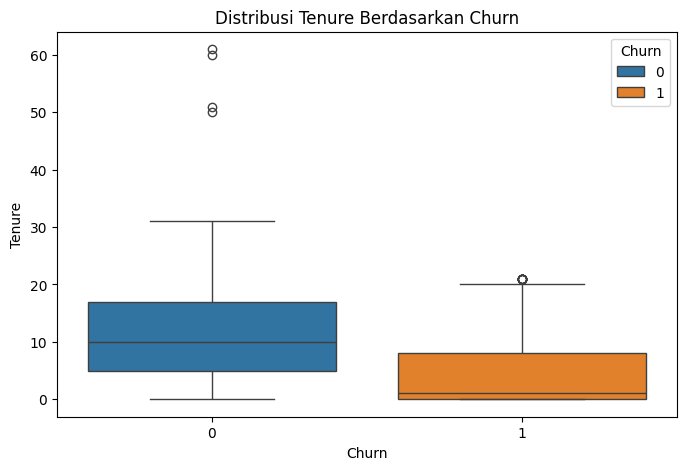

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Tenure', data=df_imputed, hue='Churn')
plt.title('Distribusi Tenure Berdasarkan Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

Pada boxplot terlihat customer churn cenderung berada tenure 0-5 tahun, namun untuk lebih jelasnya disini kami akan melihat rasio dari seluruh customer yang churn.

In [45]:
churn_percentage=churn_customers.groupby('Tenure')[['Churn']].count()
churn_percentage['Churn Percentage']=round((churn_percentage['Churn']/len(churn_customers)*100),2)
churn_percentage=churn_percentage.reset_index()
churn_percentage

,Tenure,Churn,Churn Percentage
0,0,243,28.89
1,1,309,36.74
2,2,12,1.43
3,3,15,1.78
4,4,16,1.90
5,5,15,1.78
6,6,6,0.71
7,7,13,1.55
8,8,13,1.55
9,9,12,1.43


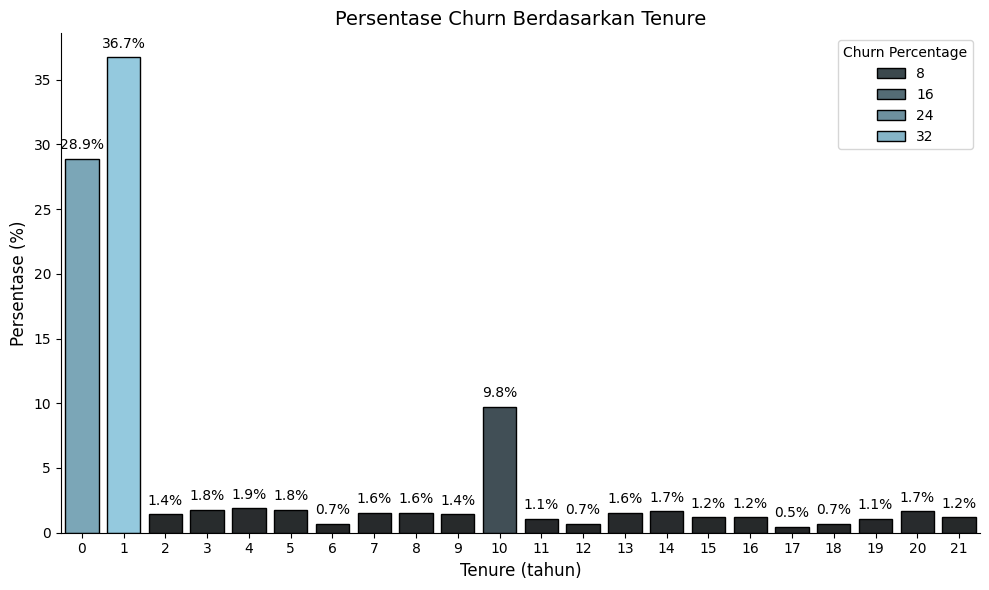

In [46]:
plt.figure(figsize=(10, 6))

# Barplot tanpa hue agar warna seragam dan bersih
ax = sns.barplot(data=churn_percentage, x='Tenure', y='Churn Percentage', color='skyblue', edgecolor='black', hue='Churn Percentage')

# Menambahkan angka persentase di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 0.5),  # dinaikkan sedikit biar rapi
                    ha='center', va='bottom', fontsize=10, color='black')

# Rapikan sumbu dan tampilan
plt.title('Persentase Churn Berdasarkan Tenure', fontsize=14)
plt.xlabel('Tenure (tahun)', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

Nah disini kita dapat melihat bahwa dari 841 customer yang dinyatakan churn, **65% nya memutuskan untuk churn pada tenure 0-1**. dengan demikian **diperlukan strategi retensi customer yang dapat mempertahankan customer setidaknya hingga melewati tahun pertamanya menggunakan layanan E-comerce ini**.

### **Complain**

In [47]:
len(churn_customers)

841

In [48]:
churn_complain=churn_customers.groupby('Complain')[['Churn']].count().reset_index()
churn_complain['Percentage']=round((churn_complain['Churn']/len(churn_customers)*100),2)
churn_complain

,Complain,Churn,Percentage
0,0,392,46.61
1,1,449,53.39


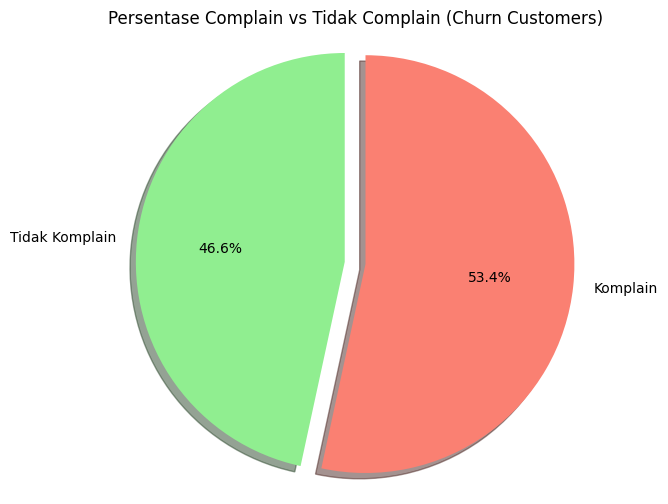

In [49]:
# Asumsikan nonchurn_complain sudah dibuat sebelumnya
# Label kategori komplain
labels = ['Tidak Komplain', 'Komplain'] if 0 in churn_complain['Complain'].values else ['Komplain', 'Tidak Komplain']
colors = ['lightgreen', 'salmon']

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    churn_complain['Percentage'],
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0, 0.1) if len(churn_complain) == 2 else None,  # hanya explode jika ada 2 kategori
    shadow=True
)

plt.title('Persentase Complain vs Tidak Complain (Churn Customers)')
plt.axis('equal')  # Biar pie chart-nya bulat
plt.show()

Dari 841 customer yang melakukan churn sebanyak 449 orang melakukan complain atau sekitar 53% dari totalnya

Sebelumnya telah diketahui bahwa custumer yang churn tersebut berada pada tenure 0-1. nah disini kami ingin mencoba mengaitkan antara tenure dan complain untuk melihat keterkaitannya

In [50]:
df_complain=churn_customers[churn_customers['Complain']==1]

In [51]:
len(df_complain)

449

Dari dataset customer yang hanya churn disini kami akan menyeleksinya lagi menjadi menjadi hanya customer yang complain saja. disini kami memperoleh bahwa dari seluruh customer yang melakukan churn terdapat 449 orang yang melakukan complain

In [52]:
complain_percentage=df_complain.groupby('Tenure')[['Complain']].count()
complain_percentage['Complain Percentage']=round((complain_percentage['Complain']/len(df_complain)*100),2)
complain_percentage=complain_percentage.reset_index()
complain_percentage

,Tenure,Complain,Complain Percentage
0,0,125,27.84
1,1,166,36.97
2,2,7,1.56
3,3,10,2.23
4,4,11,2.45
5,5,9,2.00
6,6,4,0.89
7,7,5,1.11
8,8,5,1.11
9,9,2,0.45


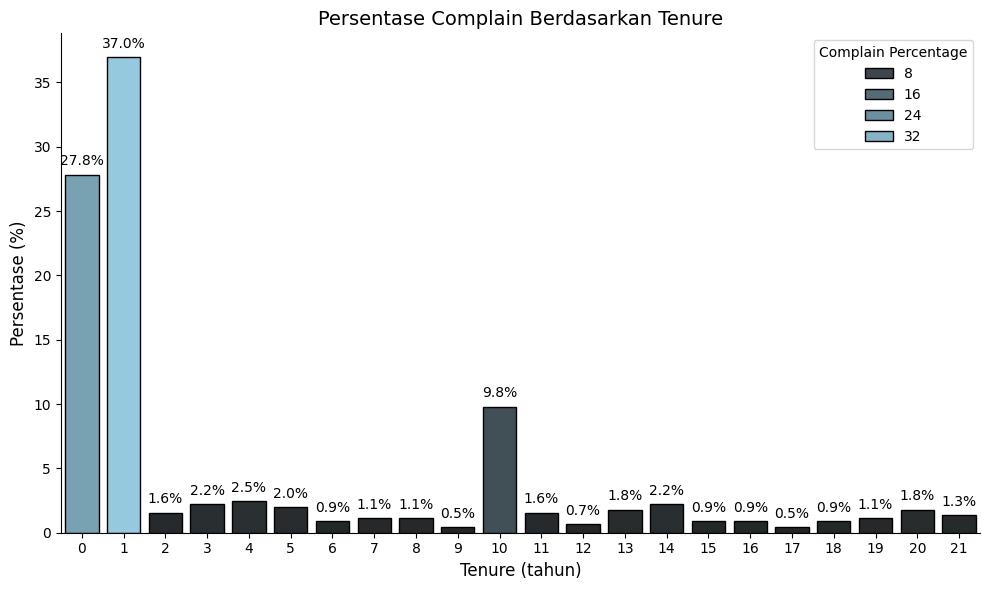

In [53]:
plt.figure(figsize=(10, 6))

# Barplot tanpa hue agar warna seragam dan bersih
ax = sns.barplot(data=complain_percentage, x='Tenure', y='Complain Percentage', color='skyblue', edgecolor='black', hue='Complain Percentage')

# Menambahkan angka persentase di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 0.5),  # dinaikkan sedikit biar rapi
                    ha='center', va='bottom', fontsize=10, color='black')

# Rapikan sumbu dan tampilan
plt.title('Persentase Complain Berdasarkan Tenure', fontsize=14)
plt.xlabel('Tenure (tahun)', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

Nah dari sini terlihat bahwa dari 449 customer yang komplain dan churn terbanyak itu berada pada rentang 0-1, atau sekitar 65% nya. jadi disini diperlukan evaluasi customer ketat minimal hingga melewati tahun pertama untuk mengetahui dan handle complain customer

## **Prefered Order Cat**

In [54]:
churn_cat=churn_customers.groupby('PreferedOrderCat')[['Churn']].count().reset_index()
churn_cat['Percentage']=round((churn_cat['Churn']/len(churn_customers)*100),2)
churn_cat=churn_cat.sort_values('Percentage', ascending=False)
churn_cat

,PreferedOrderCat,Churn,Percentage
3,Mobile Phone,488,58.03
2,Laptop & Accessory,194,23.07
0,Fashion,124,14.74
4,Others,19,2.26
1,Grocery,16,1.90


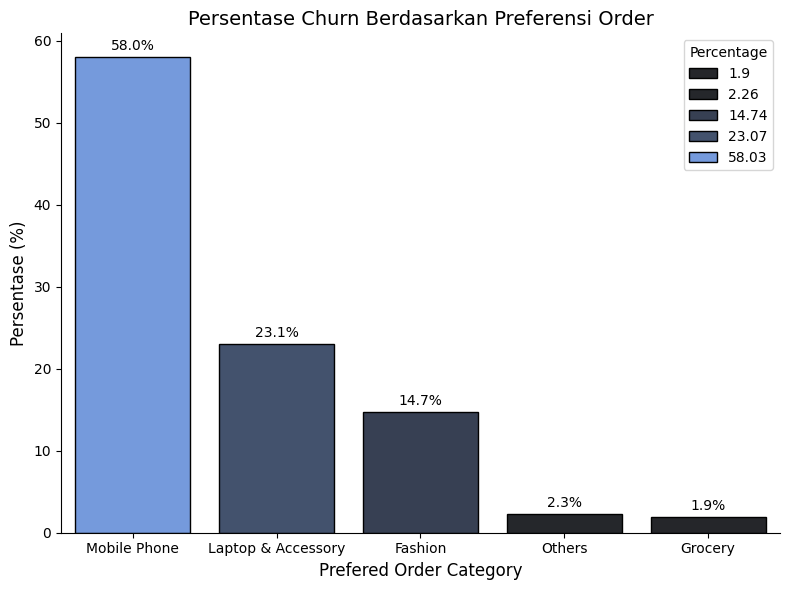

In [55]:
plt.figure(figsize=(8, 6))

# Buat barplot tanpa hue, karena hue 'Percentage' kurang relevan
ax = sns.barplot(data=churn_cat, x='PreferedOrderCat', y='Percentage', color='cornflowerblue', edgecolor='black', hue='Percentage')

# Annotate persentase di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 0.5),  # dinaikkan sedikit biar rapi
                    ha='center', va='bottom', fontsize=10)

# Rapikan tampilan
plt.title('Persentase Churn Berdasarkan Preferensi Order', fontsize=14)
plt.xlabel('Prefered Order Category', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

Dari data terlihat bahwa jumlah customer yang churn paling banyak berasal dari kategori Mobile Phone, yaitu sebanyak 488 customer atau sekitar 58% dari total customer yang churn. kemudian kami ingin melihat complain yang didapat masing-masing categori

In [56]:
len(df_complain)

449

In [57]:
complain_cat=df_complain.groupby('PreferedOrderCat')[['Complain']].count().reset_index()
complain_cat['Percentage']=round((complain_cat['Complain']/len(df_complain)*100),2)
complain_cat=complain_cat.sort_values('Percentage', ascending=False)
complain_cat

,PreferedOrderCat,Complain,Percentage
3,Mobile Phone,282,62.81
2,Laptop & Accessory,100,22.27
0,Fashion,48,10.69
4,Others,11,2.45
1,Grocery,8,1.78


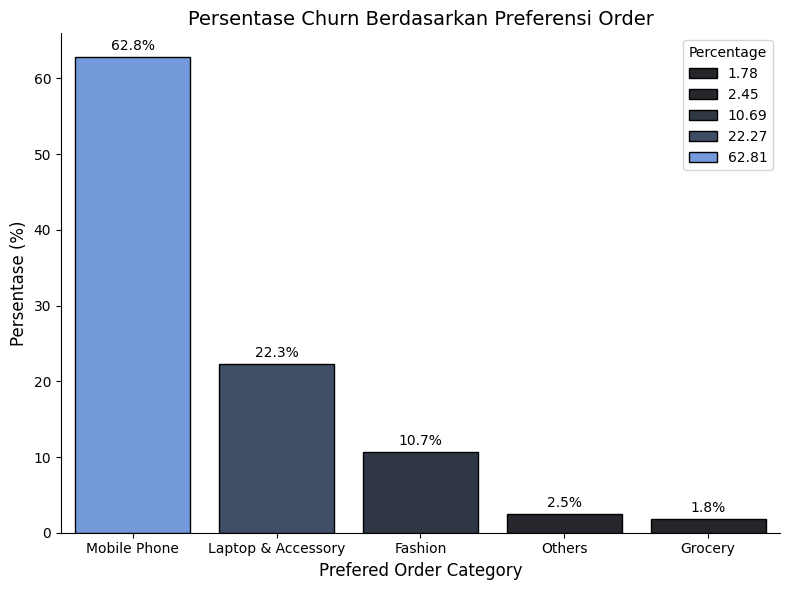

In [58]:
plt.figure(figsize=(8, 6))

# Buat barplot tanpa hue, karena hue 'Percentage' kurang relevan
ax = sns.barplot(data=complain_cat, x='PreferedOrderCat', y='Percentage', color='cornflowerblue', edgecolor='black', hue='Percentage')

# Annotate persentase di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height + 0.5),  # dinaikkan sedikit biar rapi
                    ha='center', va='bottom', fontsize=10)

# Rapikan tampilan
plt.title('Persentase Churn Berdasarkan Preferensi Order', fontsize=14)
plt.xlabel('Prefered Order Category', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.tight_layout()
plt.show()

Dari total 449 complain yang dilakukan oleh cutomer churn, complain terbanyak ada pada kategori mobile phone yitu sebanyak 282 kali atau sekitar 60% dari customer complain yang melakukan churn.

## Segmentasi LRFM
Pada bagian ini akan dilakukan segmentasi pelanggan menggunakan nilai-nilai LRFM

In [59]:
# df_imputed = df_imputed[df_imputed['Tenure'] < 50]

In [60]:
df_lrfm = df_imputed.copy()[['CustomerID', 'Tenure', 'DaySinceLastOrder', 'OrderCount', 'CashbackAmount']]
df_lrfm.rename(columns={'Tenure': 'length',
                            'DaySinceLastOrder': 'recency',
                            'OrderCount': 'frequency',
                            'CashbackAmount': 'monetary'}, inplace=True)

df_lrfm.sample(5)

,CustomerID,length,recency,frequency,monetary
287,50288,19,8,1,148.10
4827,54828,5,1,2,152.78
5297,55298,1,4,2,153.14
4190,54191,7,1,2,149.96
1570,51571,10,0,1,121.77


In [61]:
print(f'Kisaran data per quartil: {(len(df_imputed)//4)-200} - {(len(df_imputed)//4)+200}')

Kisaran data per quartil: 1068 - 1468


In [62]:
df_lrfm['l_score'] = pd.qcut(
    df_lrfm['length'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)
df_lrfm['r_score'] = pd.qcut(
    df_lrfm['recency'],
    q=4,
    labels=[4, 3, 2, 1]         # urutan ini reverse karena semakin kecil recency, semakin besar score
).astype(int)

In [63]:
df_lrfm['l_score'].value_counts().sort_index().to_frame()

,count
l_score,
1,1404
2,1196
3,1222
4,1250


In [64]:
df_lrfm['r_score'].value_counts().sort_index().to_frame()

,count
r_score,
1,1183
2,1002
3,1195
4,1692


In [65]:
df_lrfm['frequency'].value_counts().sort_index().to_frame()

,count
frequency,
1,1529
2,1788
3,594
4,187
5,175
6,127
7,197
8,166
9,60


In [66]:
print(f'Kisaran data per quartil: {(len(df_imputed)//4)-200} - {(len(df_imputed)//4)+200}')

Kisaran data per quartil: 1068 - 1468


**Insight:**
* Pada bagian frequency terlihat bahwa untuk frekuensi 1 dan 2 sudah melebihi dari kisaran panjang data dengan radius 200 data
* Frekuensi 1 sebanyak 1529, dan Frekuensi 2 sebanyak 1788
* Maka untuk bagian frequency akan dilakukan pembagian quantilenya secara manual
    * Quantil 1 akan diisi oleh frekuensi 1 saja
    * Quantil 2 akan diisi oleh frekuensi 2 saja
    * Quantil 3 akan diisi dengan pembagian 0 - 0.5 dari sisa data diluar Quantil 1 dan 2
    * Quantil 4 akan diisi dengan pembagian 0.5 - 1 dari sisa data diluar Quantil 1 dan 2

In [67]:
df_lrfm[df_lrfm['frequency'] > 2]['frequency'].quantile([0, 0.5, 1])

0.0     3.0
0.5     5.0
1.0    16.0
Name: frequency, dtype: float64

In [68]:
fq1 = 1
fq2 = 2
freq_filtered = df_lrfm[df_lrfm['frequency'] > 2]['frequency']
fq3, fq4 = freq_filtered.quantile([0.5, 1]).values
print(fq1, fq2, fq3, fq4)

1 2 5.0 16.0


In [69]:
def f_score(x):
    if x == fq1:
        return 1
    elif x == fq2:
        return 2
    elif x <= fq3:
        return 3
    else:
        return 4
    
df_lrfm['f_score'] = df_lrfm['frequency'].apply(f_score)
df_lrfm.sample(5, random_state=42)

,CustomerID,length,recency,frequency,monetary,l_score,r_score,f_score
1772,51773,30,11,13,202.66,4,1,4
3333,53334,16,4,2,177.31,4,3,2
33,50034,13,11,2,208.55,3,1,2
2283,52284,30,2,2,123.72,4,4,2
1710,51711,19,0,1,152.58,4,4,1


In [70]:
df_lrfm['f_score'].value_counts().sort_index().to_frame()

,count
f_score,
1,1529
2,1788
3,956
4,799


**Insight :**
* Maka ini hasil dari Quantile f_score yang sudah dibagi manual
* Terlihat sudah lumayan seimbang, walaupun cukup berbeda jauh jumlah datanya dengan f_score 1 dan 2

In [71]:
df_lrfm['m_score'] = pd.qcut(
    df_lrfm['monetary'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

In [72]:
df_lrfm['m_score'].value_counts().sort_index().to_frame()

,count
m_score,
1,1269
2,1267
3,1269
4,1267


In [73]:
df_lrfm['lrfm_score_total'] = df_lrfm['l_score'] + df_lrfm['r_score'] + df_lrfm['f_score'] + df_lrfm['m_score']
df_lrfm.sample(5, random_state=42)

,CustomerID,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total
1772,51773,30,11,13,202.66,4,1,4,4,13
3333,53334,16,4,2,177.31,4,3,2,3,12
33,50034,13,11,2,208.55,3,1,2,4,10
2283,52284,30,2,2,123.72,4,4,2,1,11
1710,51711,19,0,1,152.58,4,4,1,2,11


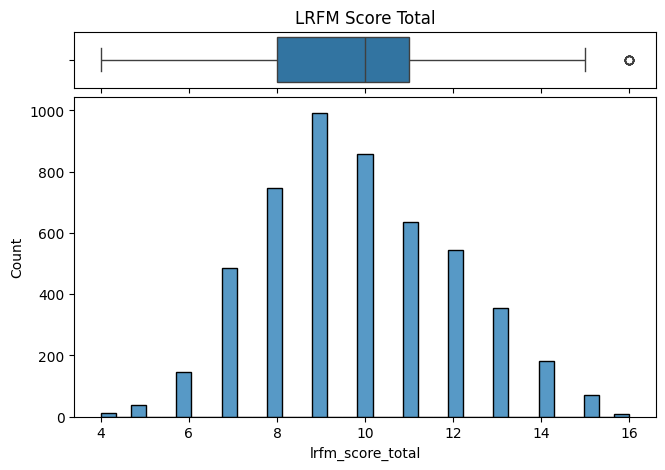

0.00     4.0
0.25     8.0
0.50    10.0
0.75    11.0
1.00    16.0
Name: lrfm_score_total, dtype: float64

In [74]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_lrfm, x='lrfm_score_total', ax=ax_top)
sns.histplot(data=df_lrfm, x='lrfm_score_total', ax=ax_bot)

ax_top.set(
    title='LRFM Score Total'
)

plt.show()
display(df_lrfm['lrfm_score_total'].quantile([0, 0.25, 0.5, 0.75, 1]))

In [75]:
def combine_lrfm_scores(row):
    # Gabungkan skor L, R, F, M sebagai string
    return (
        str(int(row['l_score'])) +
        str(int(row['r_score'])) +
        str(int(row['f_score'])) +
        str(int(row['m_score']))
    )

df_lrfm['lrfm_score_combined'] = df_lrfm.apply(combine_lrfm_scores, axis=1)

seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'New Cust Low Value',
    r'[1-2][1-4][1-4][3-4]': 'New Cust High Value',
    r'[3-4][1-2][1-2][1-2]': 'Old Cust Inactive',
    r'[3-4][1-2][3-4][3-4]': 'Need Attention',
    r'[3-4][1-2][1-4][1-4]': 'At Risk',    
    r'[3-4][3-4][3-4][3-4]': 'Loyal Cust',
    r'[3-4][3-4][3-4][1-2]': 'Potential Loyal Cust',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Old Cust'    
}

print("DataFrame Awal:")
display(df_lrfm[['CustomerID', 'lrfm_score_total', 'lrfm_score_combined']])

def get_segment_combined(score_combined):
    for pattern, segment_name in seg_map.items():
        if pd.Series([score_combined]).str.match(pattern).iloc[0]:
            return segment_name
    return 'Uncategorized'

df_lrfm['lrfm_segment_combined'] = df_lrfm['lrfm_score_combined'].apply(get_segment_combined)

print("\nDataFrame Setelah Segmentasi:")
display(df_lrfm[['CustomerID', 'lrfm_score_total', 'lrfm_score_combined', 'lrfm_segment_combined']])

DataFrame Awal:


,CustomerID,lrfm_score_total,lrfm_score_combined
0,50001,7,2212
1,50002,9,3411
2,50003,8,3311
3,50004,6,1311
4,50005,6,1311
...,...,...,...
5623,55624,10,2224
5624,55625,9,1422
5626,55627,11,3224
5627,55628,9,1323



DataFrame Setelah Segmentasi:


,CustomerID,lrfm_score_total,lrfm_score_combined,lrfm_segment_combined
0,50001,7,2212,New Cust Low Value
1,50002,9,3411,Reactivated Old Cust
2,50003,8,3311,Reactivated Old Cust
3,50004,6,1311,New Cust Low Value
4,50005,6,1311,New Cust Low Value
...,...,...,...,...
5623,55624,10,2224,New Cust High Value
5624,55625,9,1422,New Cust Low Value
5626,55627,11,3224,At Risk
5627,55628,9,1323,New Cust High Value


In [ ]:
customer_segment = df_lrfm.groupby('lrfm_segment_combined').agg({
    'length': 'median',
    'recency': 'median',
    'frequency': 'median',
    'monetary': 'median',
    'lrfm_score_total': 'mean'
}).round(2)
customer_segment.sort_values(by='lrfm_score_total', ascending=False)

,length,recency,frequency,monetary,lrfm_score_total
lrfm_segment_combined,,,,,
Loyal Cust,20.5,2.0,3.0,235.97,14.16
Need Attention,17.0,8.0,7.0,233.51,12.21
Potential Loyal Cust,14.5,3.0,3.0,149.56,11.72
Reactivated Old Cust,14.0,2.0,1.0,154.41,10.73
At Risk,16.0,8.0,2.0,183.10,10.27
New Cust High Value,4.0,5.0,2.0,184.36,9.58
Old Cust Inactive,15.0,7.0,1.0,148.48,8.03
New Cust Low Value,1.0,3.0,2.0,146.48,7.91


In [77]:
df_lrfm['lrfm_segment_combined'].value_counts().reset_index()

,lrfm_segment_combined,count
0,New Cust Low Value,1580
1,New Cust High Value,1020
2,Reactivated Old Cust,1009
3,Need Attention,603
4,At Risk,457
5,Loyal Cust,196
6,Old Cust Inactive,135
7,Potential Loyal Cust,72


In [78]:
len(df_lrfm)

5072

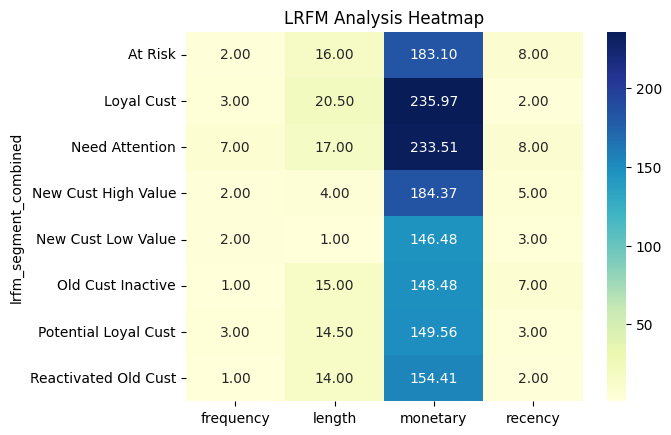

In [79]:
lrfm_heatmap = df_lrfm.pivot_table(index='lrfm_segment_combined', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [80]:
segments_data = [
    {
        "Segment": "New Cust Low Value",
        "Karakteristik": "Low Length, Low Recency, Low Frequency, Low/Medium Monetary : Pelanggan baru, jarang belanja, nilainya masih kecil.",
        "Tujuan": "Dorong pembelian kedua dan keterlibatan.",
        "Strategi": "Promo sambutan; Edukasi produk; Insentif untuk repeat order.",
        "Biaya_Marketing": 0.70
    },
    {
        "Segment": "New Cust High Value",
        "Karakteristik": "Low Length, Low Recency, Low Frequency, High Monetary : Pelanggan baru, jarang belanja tapi langsung belanja besar.",
        "Tujuan": "Jadikan pelanggan loyal.",
        "Strategi": "Follow-up personal; Tawarkan produk terkait; Kirim konten onboarding yang menarik.",
        "Biaya_Marketing": 1.00
    },
    {
        "Segment": "Old Cust Inactive",
        "Karakteristik": "High Length, High Recency, Low Frequency, Low Monetary : Pelanggan lama, sudah lama tidak aktif.",
        "Tujuan": "Bangkitkan kembali minat belanja.",
        "Strategi": "Kampanye “Kami Rindu Anda”; Diskon waktu terbatas; Tampilkan produk terbaru.",
        "Biaya_Marketing": 0.85
    },
    {
        "Segment": "Need Attention",
        "Karakteristik": "High Length, High Recency, High Frequency, High Monetary : Dulu sering belanja & bernilai tinggi, tapi akhir-akhir ini tidak aktif.",
        "Tujuan": "Ajak kembali sebelum benar-benar hilang.",
        "Strategi": "Penawaran eksklusif; Reminder produk favorit; Tanya alasan tidak aktif.",
        "Biaya_Marketing": 1.30
    },
    {
        "Segment": "At Risk",
        "Karakteristik": "High Length, High Recency, Any Frequency, Any Monetary : Pelanggan lama, mulai pasif atau tidak belanja lagi.",
        "Tujuan": "Cegah pelanggan pergi selamanya.",
        "Strategi": "Hubungi secara personal; Program loyalitas; Diskon khusus.",
        "Biaya_Marketing": 1.20
    },
    {
        "Segment": "Loyal Cust",
        "Karakteristik": "High Length, Low Recency, High Frequency, High Monetary : Pelanggan terbaik — sangat aktif dan bernilai tinggi.",
        "Tujuan": "Pertahankan loyalitas mereka.",
        "Strategi": "Akses VIP; Reward kejutan; Minta feedback atau testimoni.",
        "Biaya_Marketing": 0.50
    },
    {
        "Segment": "Potential Loyal Cust",
        "Karakteristik": "High Length, Low Recency, High Frequency, Low Monetary : Sering belanja & aktif, tapi nilainya belum tinggi.",
        "Tujuan": "Tingkatkan nilai belanja mereka.",
        "Strategi": "Cross-sell; Program poin atau hadiah; Tawarkan paket bundling.",
        "Biaya_Marketing": 0.75
    },
    {
        "Segment": "Reactivated Old Cust",
        "Karakteristik": "High Length, Low Recency, Low Frequency, Low Monetary : Lama tidak belanja, tapi baru-baru ini aktif lagi dengan transaksi kecil.",
        "Tujuan": "Dorong agar terus belanja lagi.",
        "Strategi": "Ucapan selamat datang kembali; Promo khusus; Tunjukkan perubahan atau penawaran baru.",
        "Biaya_Marketing": 0.90
    }
]




pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df_segments = pd.DataFrame(segments_data)
display(df_segments)

pd.reset_option('all')


,Segment,Karakteristik,Tujuan,Strategi,Biaya_Marketing
0,New Cust Low Value,"Low Length, Low Recency, Low Frequency, Low/Medium Monetary : Pelanggan baru, jarang belanja, nilainya masih kecil.",Dorong pembelian kedua dan keterlibatan.,Promo sambutan; Edukasi produk; Insentif untuk repeat order.,0.70
1,New Cust High Value,"Low Length, Low Recency, Low Frequency, High Monetary : Pelanggan baru, jarang belanja tapi langsung belanja besar.",Jadikan pelanggan loyal.,Follow-up personal; Tawarkan produk terkait; Kirim konten onboarding yang menarik.,1.00
2,Old Cust Inactive,"High Length, High Recency, Low Frequency, Low Monetary : Pelanggan lama, sudah lama tidak aktif.",Bangkitkan kembali minat belanja.,Kampanye “Kami Rindu Anda”; Diskon waktu terbatas; Tampilkan produk terbaru.,0.85
3,Need Attention,"High Length, High Recency, High Frequency, High Monetary : Dulu sering belanja & bernilai tinggi, tapi akhir-akhir ini tidak aktif.",Ajak kembali sebelum benar-benar hilang.,Penawaran eksklusif; Reminder produk favorit; Tanya alasan tidak aktif.,1.30
4,At Risk,"High Length, High Recency, Any Frequency, Any Monetary : Pelanggan lama, mulai pasif atau tidak belanja lagi.",Cegah pelanggan pergi selamanya.,Hubungi secara personal; Program loyalitas; Diskon khusus.,1.20
5,Loyal Cust,"High Length, Low Recency, High Frequency, High Monetary : Pelanggan terbaik — sangat aktif dan bernilai tinggi.",Pertahankan loyalitas mereka.,Akses VIP; Reward kejutan; Minta feedback atau testimoni.,0.50
6,Potential Loyal Cust,"High Length, Low Recency, High Frequency, Low Monetary : Sering belanja & aktif, tapi nilainya belum tinggi.",Tingkatkan nilai belanja mereka.,Cross-sell; Program poin atau hadiah; Tawarkan paket bundling.,0.75
7,Reactivated Old Cust,"High Length, Low Recency, Low Frequency, Low Monetary : Lama tidak belanja, tapi baru-baru ini aktif lagi dengan transaksi kecil.",Dorong agar terus belanja lagi.,Ucapan selamat datang kembali; Promo khusus; Tunjukkan perubahan atau penawaran baru.,0.90


Insight:
- Nilai Biaya_Marketing per segmen berupa persentase terhadap Biaya_Marketing semula yaitu 100 persen
- Persentase Biaya_Marketing di tiap segmen ditujukan hanya pada Customer yang terprediksi **Churn** saja pada **Model Machine Learning** yang akan dipilih nantinya

In [81]:
import plotly.express as px

color_map = {
    'Loyal Cust' : 'gray',
    'Potential Loyal Cust' : 'purple',
    'New Cust High Value' : 'pink',
    'New Cust Low Value' : 'blue',
    'Need Attention' : 'green',
    'At Risk' : 'yellow', 
    'Reactivated Old Cust' : 'orange', 
    'Old Cust Inactive' : 'red',
}

fig = px.scatter_3d(
    df_lrfm, 
    x='recency', 
    y='frequency', 
    z='monetary',
    color='lrfm_segment_combined', 
    color_discrete_map=color_map, 
)
                          
fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

Insight:
* Ini adalah ScatterPlot 3D dari nilai RFM yang dipisahkan warnanya berdasarkan segmennya

In [82]:
df_lrfm

,CustomerID,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_score_combined,lrfm_segment_combined
0,50001,4,5,1,159.93,2,2,1,2,7,2212,New Cust Low Value
1,50002,10,0,1,120.90,3,4,1,1,9,3411,Reactivated Old Cust
2,50003,10,3,1,120.28,3,3,1,1,8,3311,Reactivated Old Cust
3,50004,0,3,1,134.07,1,3,1,1,6,1311,New Cust Low Value
4,50005,0,3,1,129.60,1,3,1,1,6,1311,New Cust Low Value
...,...,...,...,...,...,...,...,...,...,...,...,...
5623,55624,5,5,2,224.36,2,2,2,4,10,2224,New Cust High Value
5624,55625,1,1,2,154.66,1,4,2,2,9,1422,New Cust Low Value
5626,55627,13,5,2,224.91,3,2,2,4,11,3224,At Risk
5627,55628,1,4,2,186.42,1,3,2,3,9,1323,New Cust High Value


In [83]:
merged_df = pd.merge(df, df_lrfm[['CustomerID', 'lrfm_segment_combined']], on='CustomerID', how='inner')
merged_df.rename(columns={'lrfm_segment_combined': 'Segment'}, inplace=True)
merged_df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         231
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                221
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 230
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    252
CouponUsed                     210
OrderCount                     243
DaySinceLastOrder              288
CashbackAmount                   0
Segment                          0
dtype: int64

In [84]:
merged_df.to_csv('E_Commerce_Dataset_Imputed.csv', index=False)

In [86]:
df_ml = merged_df.copy()

## **3. Define X and y**

Pada bagian ini, data akan dibagi menjadi 2 dimana X merupakan feature dan y merupakan target.

In [89]:
y = df_ml['Churn']
X = df_ml.drop(columns=['CustomerID','Churn'])

## **4. Splitting Data**

Data tersebut dibagi menjadi 2 data:
1. 80% data akan menjadi data train untuk melatih model
2. 20% data akan menjadi data test untuk mengevaluasi model

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0,
    test_size=0.2,
    stratify=y
)
len(X_train), len(X_test), len(y_train), len(y_test)

(4057, 1015, 4057, 1015)

## **5. Preprocessing**

Dalam tahap preprocessing, dilakukan beberapa transformasi untuk mempersiapkan data sebelum dimasukkan ke dalam model machine learning. Beberapa fitur kategorikal dikodekan sesuai dengan karakteristiknya. Fitur-fitur seperti 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', dan 'EightSegment' dikodekan menggunakan One-Hot Encoding karena tidak memiliki tingkatan dan bersifat nominal.

Untuk fitur numerik seperti 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount' dibuat pipeline sehingga fitur tersebut diimpute dengan Iterative Imputer karena memiliki missing value dan berikutnya di scaling dengan Robust Scaler. Pemilihan scaler ini bertujuan untuk mengurangi pengaruh nilai ekstrem (outliers) pada proses pelatihan model, karena Robust Scaler melakukan penskalaan berdasarkan interquartile range (IQR).

lalu terdapat fitur yang tidak mengalami perlakuan pada preprocessing seperti 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain'

Langkah-langkah preprocessing ini dilakukan agar model dapat belajar dari data dalam format numerik yang konsisten, terstandardisasi, dan optimal untuk performa prediktif.
- Imputing & scaling : 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder'

- Encoding:
    - OneHot: 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'EightSegment'

- Pass: 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain'

In [91]:
pipeline_imputer_scaler = Pipeline([
    ('imputer', IterativeImputer(min_value=0)),
    ('robust', RobustScaler())
])

In [92]:
transformer = ColumnTransformer([
    ('pipeline_imputer_scaler',pipeline_imputer_scaler,['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']),
    ('encoder',OneHotEncoder(drop='first'),['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Segment']),
],remainder='passthrough')

Dikarenakan distribusi nilai pada variabel target `Churn` tidak seimbang (imbalanced), maka akan dilakukan penyeimbangan data menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique) guna meningkatkan kinerja model prediktif terhadap kelas minoritas.

In [93]:
# define resampler
smote = SMOTE(random_state=0, sampling_strategy='minority', k_neighbors= 11)

## **6. Cross Validation**

Pada tahap ini akan dilakukan modeling tanpa dilakukan hyperparameter tuning pada beberapa opsi model machine learning yaitu:
- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier
- XGBClassifier

Model yang terbaik akan dipilih berdasarkan skor f2-score dan akan digunakan untuk memprediksi nilai pada data X_test. Hasil prediksi tersebut akan menjadi benchmark nilai model sebelum melakukan hyperparameter tuning pada tahapan berikutnya.

In [94]:
# define algo
logistic = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0,estimator=DecisionTreeClassifier(random_state=0,max_depth=1))
gradboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

# Define scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

In [95]:
list_model = [logistic, knn, tree, rf, adaboost, gradboost,xgboost]

list_f2score_all = []
list_f2score_mean = []
list_f2score_std = []

for model in list_model:
    # pipe_model
    pipe_model = Pipeline([
        ('preprocession', transformer),
        ("resampling", smote),
        ("modeling", model)
    ])

    # cv
    cv_score = cross_val_score(
        estimator = pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring = f2_scorer
    )
    list_f2score_all.append(cv_score.round(2))
    list_f2score_mean.append(cv_score.mean())
    list_f2score_std.append(cv_score.std())

In [96]:
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["f2_scorer"] = list_f2score_all
df_cv["f2_scorer_mean"] = list_f2score_mean
df_cv["f2_scorer_std"] = list_f2score_std
df_cv.sort_values(by='f2_scorer_mean',ascending=False)

,model,f2_scorer,f2_scorer_mean,f2_scorer_std
6,"XGBClassifier(base_score=None, booster=None, c...","[0.78, 0.84, 0.81, 0.81, 0.81]",0.811556,0.020010
3,RandomForestClassifier(random_state=0),"[0.74, 0.74, 0.77, 0.78, 0.77]",0.760728,0.016050
1,KNeighborsClassifier(),"[0.72, 0.77, 0.79, 0.74, 0.74]",0.753275,0.026323
2,DecisionTreeClassifier(random_state=0),"[0.73, 0.73, 0.72, 0.74, 0.69]",0.723485,0.018382
0,LogisticRegression(random_state=0),"[0.67, 0.7, 0.68, 0.72, 0.73]",0.700822,0.023526
5,GradientBoostingClassifier(random_state=0),"[0.62, 0.68, 0.64, 0.7, 0.7]",0.666311,0.035106
4,AdaBoostClassifier(estimator=DecisionTreeClass...,"[0.64, 0.62, 0.64, 0.67, 0.7]",0.652976,0.029679


Terlihat bahwa model **XGBClassifier** memiliki nilai rata-rata evaluasi metrics yang terbaik dan standar devisiasi yang tidak besar menandakan model tersebut memiliki nilai evaluasi metrics yang stabil. Maka dari itu, model ini yang akan digunakan pada hyperparameter tuning dan ditest dengan data test.

## **7. Hyperparameter Tuning**

**XGBClassifier**

Untuk mendapatkan performa terbaik dari model XGBClassifier, dilakukan proses hyperparameter tuning menggunakan pendekatan GridSearchCV. Proses ini secara sistematis mengevaluasi semua kombinasi parameter yang telah ditentukan, menggunakan skema validasi silang sebanyak 5-fold dan metrik evaluasi berbasis F2-score, yang lebih mengutamakan kemampuan model dalam mengenali kelas minoritas (churn).

Adapun parameter yang dituning pada model meliputi:
- n_estimators: Menentukan jumlah pohon yang akan dibangun dalam boosting.
- learning_rate : Menentukan seberapa besar kontribusi setiap pohon dalam proses boosting.
- max_depth : Mengontrol kedalaman maksimum setiap pohon.
- min_child_weight : Menentukan jumlah minimum bobot total instance pada satu leaf node.

sedangkan parameter yang dituning pada resampler SMOTE meliputi: 
- k_neighbors: Menentukan jumlah tetangga terdekat yang digunakan oleh SMOTE untuk membuat sampel sintetis dari kelas minoritas

Proses ini dibungkus dalam sebuah Pipeline untuk memastikan tahapan preprocessing dan pemodelan dilakukan secara konsisten selama proses tuning.

In [97]:
# define hyperparameter XGB
hyperparam = {
    "modeling__n_estimators": [100, 150, 200, 250],
    "modeling__learning_rate": [0.01, 0.1],
    "modeling__max_depth" : range(1, 11),
    "modeling__min_child_weight" : range(1, 11),
    "resampling__k_neighbors" : [5, 7, 9, 11]
}

# define pipe_model
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampling", smote),
    ("modeling", xgboost)
])

gridsearch = GridSearchCV(
    estimator= pipe_model,
    param_grid=hyperparam,
    scoring = f2_scorer,
    n_jobs = -1,
    cv = 5
)

In [98]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline_imputer_scaler',
                                                                         Pipeline(steps=[('imputer',
                                                                                          IterativeImputer(min_value=0)),
                                                                                         ('robust',
                                                                                          RobustScaler())]),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'HourSpendOnApp',
                                                                          'OrderAmountHikeFromlastYear',
                                                                          'CouponUsed',
                                                                          'OrderCount',
                                                                          'DaySinceLastOrder'...
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'modeling__learning_rate': [0.01, 0.1],
                         'modeling__max_depth': range(1, 11),
                         'modeling__min_child_weight': range(1, 11),
                         'modeling__n_estimators': [100, 150, 200, 250],
                         'resampling__k_neighbors': [5, 7, 9, 11]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [99]:
pd.DataFrame(gridsearch.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__learning_rate,param_modeling__max_depth,param_modeling__min_child_weight,param_modeling__n_estimators,param_resampling__k_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2893,3.645223,0.413735,0.119589,0.071922,0.1,9,1,250,7,"{'modeling__learning_rate': 0.1, 'modeling__ma...",0.776256,0.852018,0.848485,0.854766,0.839525,0.834210,0.029429,1
2749,2.710681,0.339259,0.167684,0.121191,0.1,8,2,250,7,"{'modeling__learning_rate': 0.1, 'modeling__ma...",0.780303,0.843373,0.859729,0.837139,0.846954,0.833499,0.027603,2
2574,2.441650,0.343169,0.070785,0.012468,0.1,7,1,250,9,"{'modeling__learning_rate': 0.1, 'modeling__ma...",0.787879,0.853293,0.838415,0.847328,0.833333,0.832050,0.023143,3
2570,2.567421,0.124881,0.110257,0.042611,0.1,7,1,200,9,"{'modeling__learning_rate': 0.1, 'modeling__ma...",0.794251,0.845808,0.829528,0.853659,0.834564,0.831562,0.020477,4
2575,2.569475,0.428758,0.077037,0.041710,0.1,7,1,250,11,"{'modeling__learning_rate': 0.1, 'modeling__ma...",0.803030,0.854573,0.838415,0.815385,0.841950,0.830670,0.018741,5


In [100]:
gridsearch_result = pd.DataFrame(gridsearch.cv_results_).sort_values("rank_test_score")

In [101]:
best_param = gridsearch_result[gridsearch_result["rank_test_score"] == 1] \
[['param_modeling__learning_rate',
  'param_modeling__max_depth',
  'param_modeling__min_child_weight',
  'param_modeling__n_estimators',
  'param_resampling__k_neighbors']].T

Model terbaik yang diperoleh adalah XGBClassifier dengan konfigurasi parameter sebagai berikut:

In [102]:
best_param

,2893
param_modeling__learning_rate,0.1
param_modeling__max_depth,9.0
param_modeling__min_child_weight,1.0
param_modeling__n_estimators,250.0
param_resampling__k_neighbors,7.0


Konfigurasi ini menghasilkan performa optimal pada model dalam memprediksi customer yang berpotensi churn

## **8. Predict to Data Test**

**Prediksi terhadap data train**

In [103]:
# define pipe_model
model_train = gridsearch.best_estimator_

# fitting to data train
model_train.fit(X_train, y_train)

# predict to data test
y_pred_before_train = model_train.predict(X_train)

# scoring
fbeta_score(y_train, y_pred_before_train, beta=2)

1.0

**Prediksi sebelum tuning**

In [104]:
# define pipe_model
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampling", smote),
    ("modeling", xgboost)
])

# fitting to data train
pipe_model.fit(X_train, y_train)

# predict to data test
y_pred_before = pipe_model.predict(X_test)

# scoring
fbeta_score(y_test, y_pred_before, beta=2)


0.9150717703349283

**Prediksi setelah tuning**

In [105]:
# define pipe_model
final_model = gridsearch.best_estimator_

# fitting to data train
final_model.fit(X_train, y_train)

# predict to data test
y_pred_after = final_model.predict(X_test)

# scoring
fbeta_score(y_test, y_pred_after, beta=2)

0.9252669039145908

In [106]:
# print score
print(classification_report(y_test,y_pred_after)), print(f'f2 score:  {fbeta_score(y_test,y_pred_after,beta=2)}')

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       847
           1       0.91      0.93      0.92       168

    accuracy                           0.97      1015
   macro avg       0.95      0.96      0.95      1015
weighted avg       0.97      0.97      0.97      1015

f2 score:  0.9252669039145908


(None, None)

In [107]:
# before tuning
cm_before = confusion_matrix(y_test, y_pred_before)

# after tuning dan pemilihan threshold
cm_after = confusion_matrix(y_test, y_pred_after)

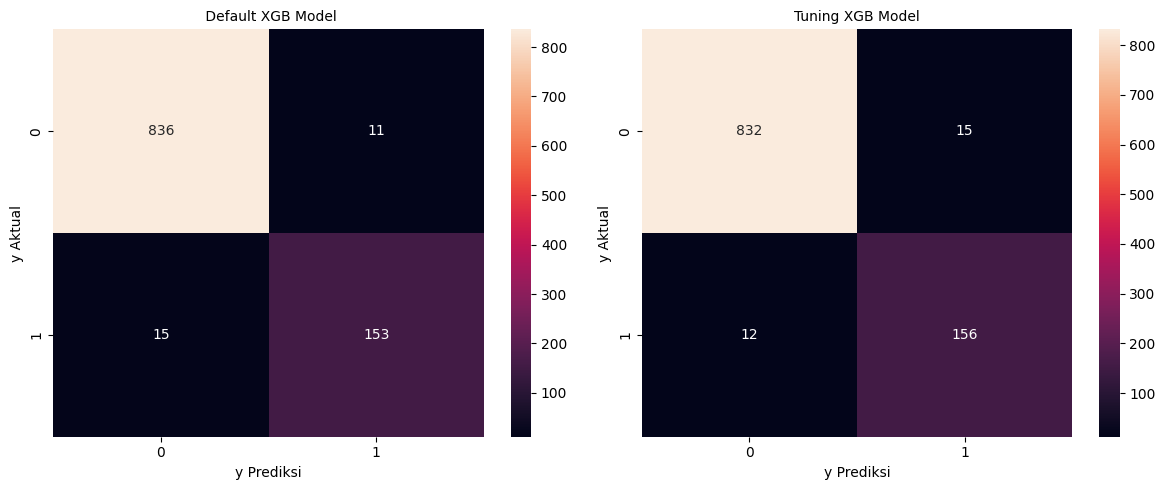

In [108]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f''' Default XGB Model''', size=10)

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title(f'''Tuning XGB Model''', size=10)
plt.tight_layout()
plt.show()

Setelah melalui proses tuning hyperparameter, model mencapai nilai F2-Score sebesar 0.9412. Nilai ini menunjukkan bahwa model mampu menyeimbangkan antara presisi dan recall, dengan fokus lebih pada kemampuan mengenali pelanggan yang berisiko churn.

Nilai recall model sebesar 0.95 menunjukkan bahwa dari seluruh customer yang benar-benar melakukan churn, model mampu mengidentifikasi sekitar 95% dengan tepat sebagai positif, sementara sisanya mengalami kesalahan klasifikasi sebagai negatif (false negatives).

## **9. Feature Importance**

Pada bagian ini akan dilihat feature mana yang paling berpengaruh terhadap model prediksi.

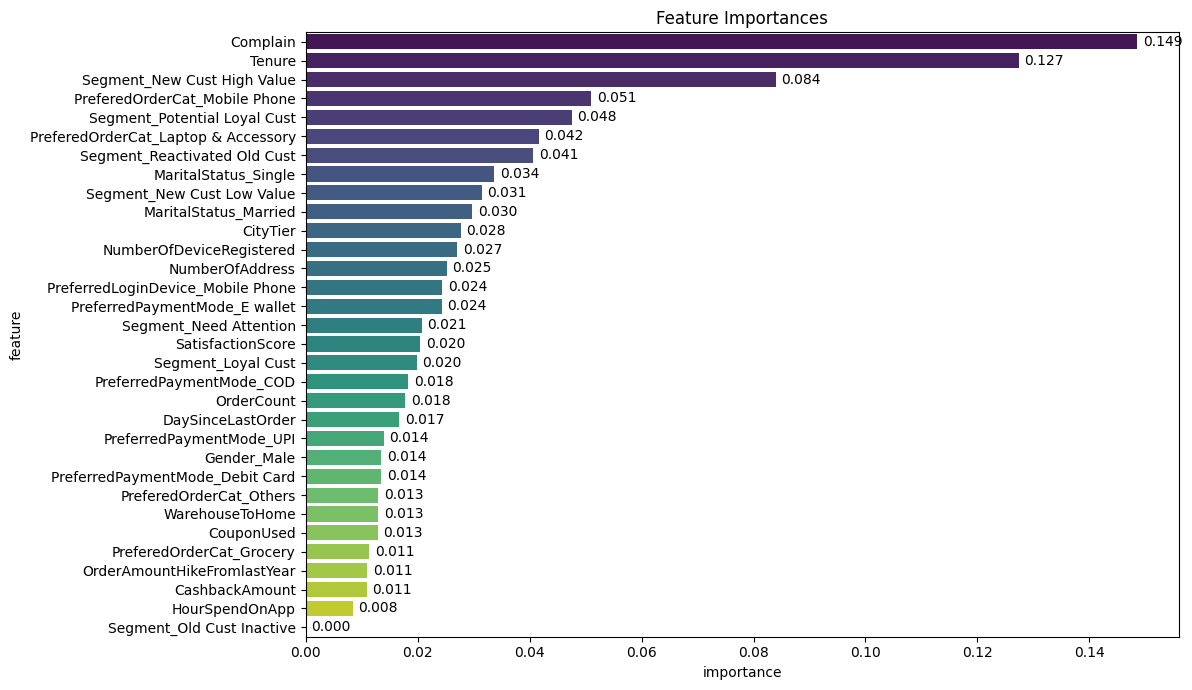

In [109]:
#mengeluarkan nama kolom dari kolom transformers
features = list(final_model[0].transformers_[0][1].get_feature_names_out()) + list(final_model[0].transformers_[1][1].get_feature_names_out()) + list(final_model[0].transformers_[2][1].get_feature_names_out())

#visualisasi feature importances
feature_importance = pd.DataFrame({'feature': features,
                                    'importance': final_model[2].feature_importances_}).sort_values('importance', ascending =False)
plt.figure(figsize=(12,7))
ax = sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')

# Tambahkan angka di ujung bar
for i, (value, name) in enumerate(zip(feature_importance['importance'], feature_importance['feature'])):
    ax.text(value + 0.001, i, f'{value:.3f}', va='center')

plt.title("Feature Importances")
plt.tight_layout()
plt.show()

Adapun 3 fitur yang paling berpengaruh terhadap keputusan model, disusun dari yang tertinggi adalah:
- Complain
- Tenure
- Segment_New Cust High Value

Fitur-fitur tersebut menjadi indikator utama dalam memprediksi potensi customer untuk melakukan churn.

## **Cost Evaluation**

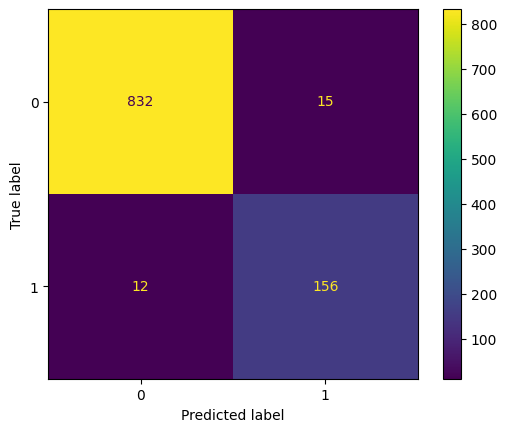

In [110]:
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after)
disp_after.plot()

Sesuai yang disebutkan dalam evaluation metric, ada asumsi berikut:
- biaya retain : 100
- potensial loss: 500

**Model Before Tuning**

In [111]:
tn = cm_before[0][0]
fp = cm_before[0][1]
fn = cm_before[1][0]
tp = cm_before[1][1]

# Perhitungan untuk Mass Marketing (tanpa ML)
cost_mass_campaign_before = (tn + fp + fn + tp) * 100
benefit_mass_campaign_before = (fn + tp) * 500
nett_benefit_mass_campaign_before = benefit_mass_campaign_before - cost_mass_campaign_before

# Perhitungan untuk ML
cost_campaign_before_ml = (fp + tp) * 100 + fn * 500
benefit_ml_before = tp * 500
nett_benefit_ml_before = benefit_ml_before - cost_campaign_before_ml

# Buat DataFrame hasil perbandingan
cost_before = {
    'Type': ['Mass Marketing', 'ML'],
    'CostCampaign': [cost_mass_campaign_before, cost_campaign_before_ml],
    'Benefit': [benefit_mass_campaign_before, benefit_ml_before],
    'NettBenefit': [nett_benefit_mass_campaign_before, nett_benefit_ml_before]
}
df_cost_ml_before = pd.DataFrame(data=cost_before)

# Hitung nilai dan persentase perubahan antara Mass Marketing dan ML
penurunan_cost = df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'CostCampaign'].values[0] - \
                 df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'ML', 'CostCampaign'].values[0]
penurunan_cost_pct = (penurunan_cost / df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'CostCampaign'].values[0]) * 100

kenaikan_nett_benefit = df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'ML', 'NettBenefit'].values[0] - \
                        df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'NettBenefit'].values[0]
kenaikan_nett_benefit_pct = (kenaikan_nett_benefit / df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'NettBenefit'].values[0]) * 100

# Buat DataFrame ringkasan
summary_df = pd.DataFrame({
    'Kategori': ['CostCampaign', 'NettBenefit'],
    'Nilai Perubahan': [penurunan_cost, kenaikan_nett_benefit],
    'Persentase Perubahan (%)': [abs(round(penurunan_cost_pct, 2)), abs(round(kenaikan_nett_benefit_pct, 2))]
})

# Tampilkan
display(df_cost_ml_before, summary_df)


,Type,CostCampaign,Benefit,NettBenefit
0,Mass Marketing,101500,84000,-17500
1,ML,23900,76500,52600


,Kategori,Nilai Perubahan,Persentase Perubahan (%)
0,CostCampaign,77600,76.45
1,NettBenefit,70100,400.57


Terlihat dari tabel di atas bahwa campaign yang menggunakan Machine Learning menghasilkan:
- `CostCampaign` berkurang sebesar **77.600** atau turun **76,45%**
- `NettBenefit` meningkat sebesar **70.100** atau naik **400,57%**

**Model After Tuning**

In [112]:
tn = cm_after[0][0]
fp = cm_after[0][1]
fn = cm_after[1][0]
tp = cm_after[1][1]

# Perhitungan untuk ML setelah tuning
cost_campaign_after_ml = (fp + tp) * 100 + fn * 500
benefit_ml_after = tp * 500
nett_benefit_ml_after = benefit_ml_after - cost_campaign_after_ml

# Buat DataFrame hasil perbandingan ML sebelum dan sesudah tuning
cost_after = {
    'Type': ['ML Before Tuning', 'ML After Tuning'],
    'CostCampaign': [cost_campaign_before_ml, cost_campaign_after_ml],
    'Benefit': [benefit_ml_before, benefit_ml_after],
    'NettBenefit': [nett_benefit_ml_before, nett_benefit_ml_after]
}
df_cost_ml_after = pd.DataFrame(data=cost_after)

# Hitung nilai dan persentase perubahan antara ML Before Tuning dan ML After Tuning
penurunan_cost_tuning = df_cost_ml_after.loc[df_cost_ml_after['Type'] == 'ML Before Tuning', 'CostCampaign'].values[0] - \
                        df_cost_ml_after.loc[df_cost_ml_after['Type'] == 'ML After Tuning', 'CostCampaign'].values[0]
penurunan_cost_tuning_pct = (penurunan_cost_tuning / df_cost_ml_after.loc[df_cost_ml_after['Type'] == 'ML Before Tuning', 'CostCampaign'].values[0]) * 100

kenaikan_nettbenefit_tuning = df_cost_ml_after.loc[df_cost_ml_after['Type'] == 'ML After Tuning', 'NettBenefit'].values[0] - \
                              df_cost_ml_after.loc[df_cost_ml_after['Type'] == 'ML Before Tuning', 'NettBenefit'].values[0]
kenaikan_nettbenefit_tuning_pct = (kenaikan_nettbenefit_tuning / df_cost_ml_after.loc[df_cost_ml_after['Type'] == 'ML Before Tuning', 'NettBenefit'].values[0]) * 100

# Buat DataFrame ringkasan
summary_tuning_df = pd.DataFrame({
    'Kategori': ['CostCampaign', 'NettBenefit'],
    'Nilai Perubahan': [round(penurunan_cost_tuning, 2), round(kenaikan_nettbenefit_tuning, 2)],
    'Persentase Perubahan (%)': [round(abs(penurunan_cost_tuning_pct), 2), round(abs(kenaikan_nettbenefit_tuning_pct), 2)]
})

# Tampilkan
display(df_cost_ml_after, summary_tuning_df)

,Type,CostCampaign,Benefit,NettBenefit
0,ML Before Tuning,23900,76500,52600
1,ML After Tuning,23100,78000,54900


,Kategori,Nilai Perubahan,Persentase Perubahan (%)
0,CostCampaign,800,3.35
1,NettBenefit,2300,4.37


Terlihat dari tabel di atas bahwa campaign yang menggunakan Machine Learning yang sudah dituning memberikan hasil sebagai berikut:
- `CostCampaign` berkurang sebesar **800** atau turun **3,35%**
- `NettBenefit` meningkat sebesar **2.300** atau naik **4,37%**

## **CM per segmen**

In [157]:
X_test['y'] = y_test
X_test['ypred'] = y_pred_after

In [158]:
segments_8 = [
    'New Cust Low Value', 'Reactivated Old Cust', 'New Cust High Value',
    'Need Attention', 'At Risk', 'Loyal Cust',
    'Old Cust Inactive', 'Potential Loyal Cust'
]

# Inisialisasi list hasil
list_type = []
list_f2 = []
list_tn = []
list_fp = []
list_fn = []
list_tp = []

# Loop semua segmen
for seg in segments_8:
    subset = X_test[X_test['Segment'] == seg]
    y_true = subset['y']
    y_pred = subset['ypred']

    # Hitung F2 dan confusion matrix
    f2 = fbeta_score(y_true, y_pred, beta=2, zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

    # Pecah confusion matrix
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2,2) else (0,0,0,0)

    # Simpan
    list_type.append(seg)
    list_f2.append(f2)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)
    list_tp.append(tp)

# Buat DataFrame hasil
df_segment_f2score = pd.DataFrame({
    'Type': list_type,
    'F2 Score': list_f2,
    'TN': list_tn,
    'FP': list_fp,
    'FN': list_fn,
    'TP': list_tp
})

df_segment_f2score = df_segment_f2score.sort_values(by=['FP', 'FN'], ascending=[False, False])
df_segment_f2score

,Type,F2 Score,TN,FP,FN,TP
0,New Cust Low Value,0.924453,210,10,7,93
2,New Cust High Value,0.943396,154,5,1,30
4,At Risk,0.757576,89,0,2,5
1,Reactivated Old Cust,0.957447,179,0,1,18
6,Old Cust Inactive,0.000000,17,0,1,0
3,Need Attention,1.000000,125,0,0,8
5,Loyal Cust,1.000000,43,0,0,2
7,Potential Loyal Cust,0.000000,15,0,0,0


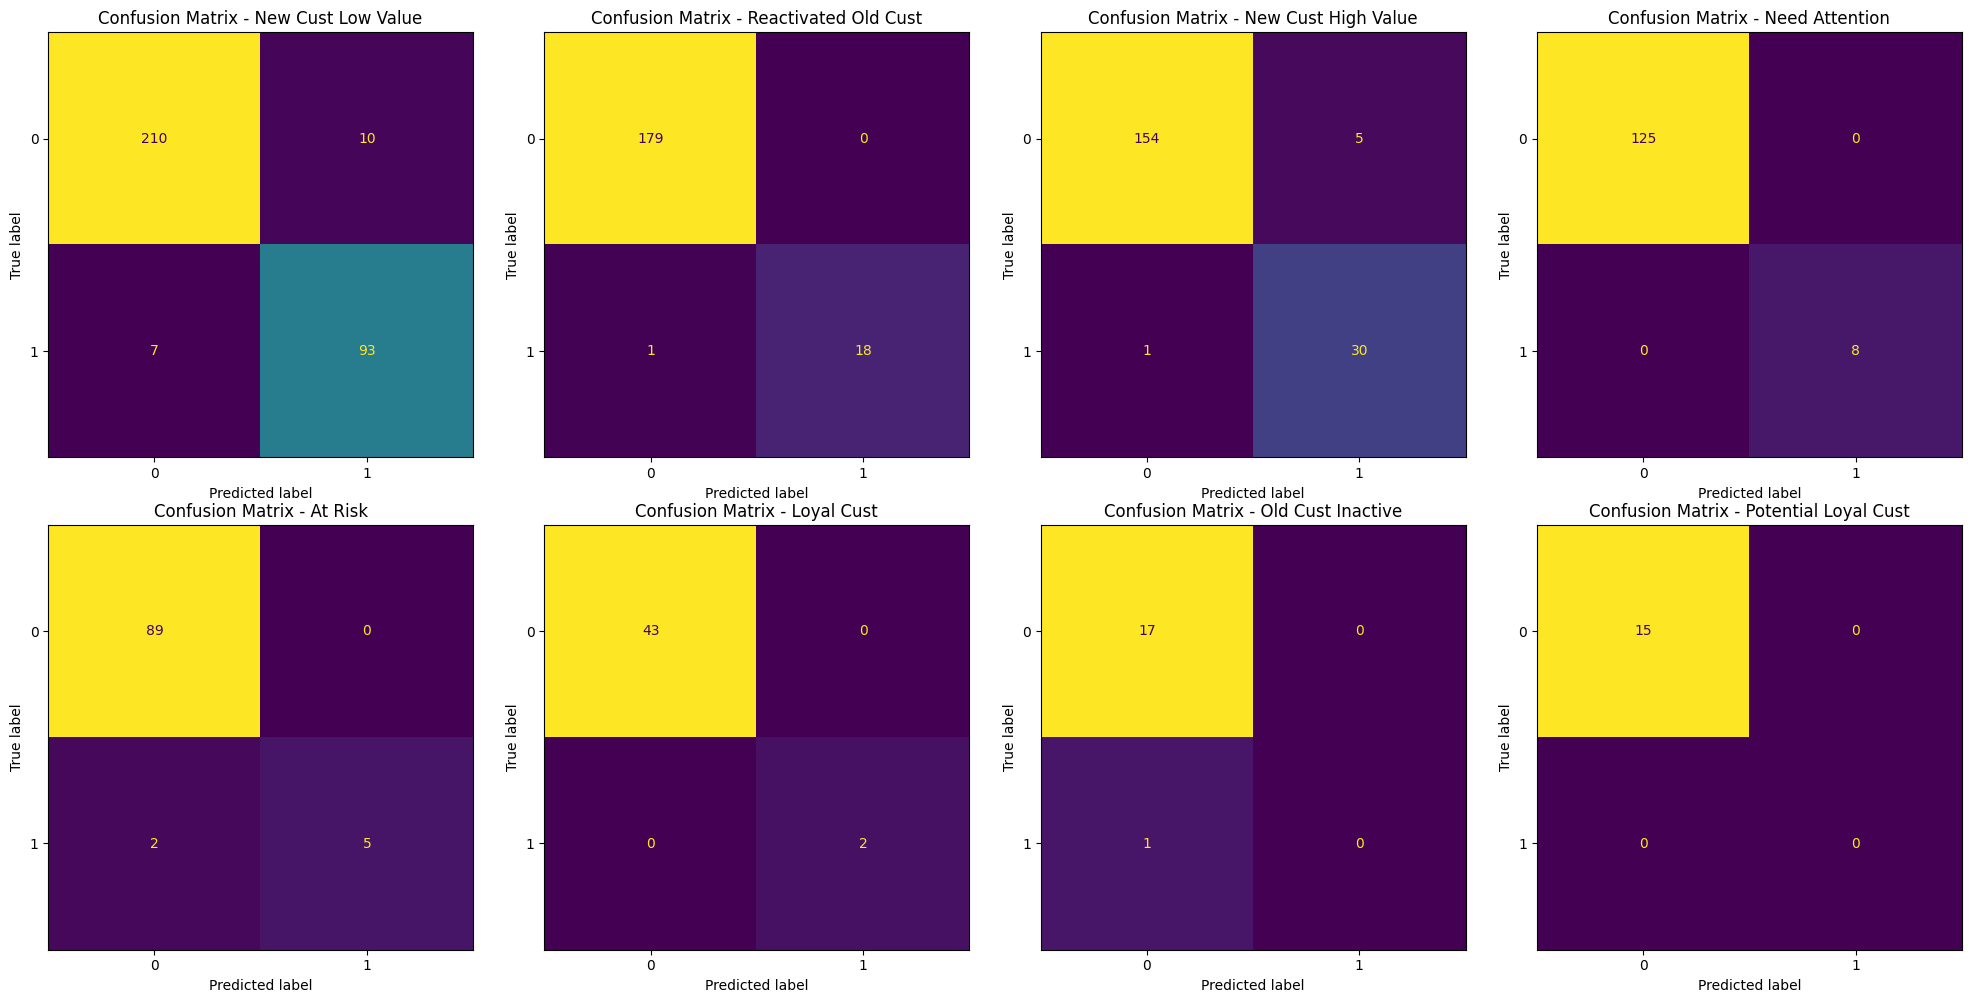

In [160]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten to easily iterate over

for i, seg in enumerate(segments_8):
    subset = X_test[X_test['Segment'] == seg]
    y_true = subset['y']
    y_pred = subset['ypred']

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f'Confusion Matrix - {seg}')

plt.tight_layout()
plt.show()


**Insight:**

* Model **paling akurat** memprediksi segmen:
    - **Need Attention**
    - **Loyal Cust**
* Segmen lain dengan hasil **sangat baik**:
    - **Reactivated Old Cust**
    - **New Cust High Value**
    - **New Cust Low Value**
* Segmen **At Risk** masih cukup baik, tapi ada beberapa salah prediksi.
* Segmen **Potential Loyal Cust** dan **Old Cust Inactive** belum terdeteksi sama sekali, sehingga perlu dicek lagi datanya atau modelnya.


In [161]:
tn = cm_after[0][0]
fp = cm_after[0][1]
fn = cm_after[1][0]
tp = cm_after[1][1]

# Perhitungan untuk ML setelah tuning
cost_campaign_after_ml = (fp + tp) * 100 + fn * 500
benefit_ml_after = tp * 500
nett_benefit_ml_after = benefit_ml_after - cost_campaign_after_ml

# Buat DataFrame hasil ML setelah tuning saja
df_cost_ml_after_only = pd.DataFrame({
    'Type': ['ML After Tuning'],
    'CostCampaign': [cost_campaign_after_ml],
    'Benefit': [benefit_ml_after],
    'NettBenefit': [nett_benefit_ml_after]
})

# Tampilkan
display(df_cost_ml_after_only)

,Type,CostCampaign,Benefit,NettBenefit
0,ML After Tuning,23100,78000,54900


In [162]:
# Daftar untuk menyimpan hasil per segment
segment_costs = []

for seg in segments_8:
    subset = X_test[X_test['Segment'] == seg]
    y_true = subset['y']
    y_pred = subset['ypred']

    # Confusion matrix per segment
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    fp_tp = df_segments[df_segments['Segment'] == seg]['Biaya_Marketing'].values[0]

    # Hitung cost, benefit, dan nett benefit
    cost_campaign = (fp + tp) * fp_tp * 100 + fn * 500
    benefit = tp * 500
    nett_benefit = benefit - cost_campaign

    # Simpan ke list
    segment_costs.append({
        'Segment': seg,
        'CostCampaign': cost_campaign,
        'Benefit': benefit,
        'NettBenefit': nett_benefit
    })

# Buat DataFrame hasil per segment
df_segment_costs = pd.DataFrame(segment_costs)

# Tambahkan baris total
total_row = {
    'Segment': 'Total All Segment',
    'CostCampaign': df_segment_costs['CostCampaign'].sum(),
    'Benefit': df_segment_costs['Benefit'].sum(),
    'NettBenefit': df_segment_costs['NettBenefit'].sum()
}
df_segment_costs.loc[len(df_segment_costs)] = total_row

# Tampilkan
display(df_segment_costs)


# Tabel perbandingan

# Ambil data dari df_cost_ml_after_only
cost_campaign_after_ml = df_cost_ml_after_only.loc[0, 'CostCampaign']
benefit_ml_after = df_cost_ml_after_only.loc[0, 'Benefit']
nett_benefit_ml_after = df_cost_ml_after_only.loc[0, 'NettBenefit']

# Ambil data dari 'Total All Segment' di df_segment_costs
total_all_segment = df_segment_costs[df_segment_costs['Segment'] == 'Total All Segment'].iloc[0]
cost_campaign_total_segment = total_all_segment['CostCampaign']
benefit_total_segment = total_all_segment['Benefit']
nett_benefit_total_segment = total_all_segment['NettBenefit']

# Buat DataFrame hasil perbandingan ML after tuning vs total segment
df_compare_total = pd.DataFrame({
    'Type': ['ML After Tuning', 'Total All Segment'],
    'CostCampaign': [cost_campaign_after_ml, cost_campaign_total_segment],
    'Benefit': [benefit_ml_after, benefit_total_segment],
    'NettBenefit': [nett_benefit_ml_after, nett_benefit_total_segment]
})

# Hitung perubahan nilai dan persentase
penurunan_cost_total = cost_campaign_after_ml - cost_campaign_total_segment
penurunan_cost_total_pct = (penurunan_cost_total / cost_campaign_after_ml) * 100

kenaikan_nettbenefit_total = nett_benefit_total_segment - nett_benefit_ml_after
kenaikan_nettbenefit_total_pct = (kenaikan_nettbenefit_total / nett_benefit_ml_after) * 100

# Buat DataFrame ringkasan perubahan
summary_total_comparison_df = pd.DataFrame({
    'Kategori': ['CostCampaign', 'NettBenefit'],
    'Nilai Perubahan': [round(penurunan_cost_total, 2), round(kenaikan_nettbenefit_total, 2)],
    'Persentase Perubahan (%)': [round(abs(penurunan_cost_total_pct), 2), round(abs(kenaikan_nettbenefit_total_pct), 2)]
})

# Tampilkan hasil
display(df_compare_total, summary_total_comparison_df)

,Segment,CostCampaign,Benefit,NettBenefit
0,New Cust Low Value,10710.0,46500,35790.0
1,Reactivated Old Cust,2120.0,9000,6880.0
2,New Cust High Value,4000.0,15000,11000.0
3,Need Attention,1040.0,4000,2960.0
4,At Risk,1600.0,2500,900.0
5,Loyal Cust,100.0,1000,900.0
6,Old Cust Inactive,500.0,0,-500.0
7,Potential Loyal Cust,0.0,0,0.0
8,Total All Segment,20070.0,78000,57930.0


,Type,CostCampaign,Benefit,NettBenefit
0,ML After Tuning,23100.0,78000,54900.0
1,Total All Segment,20070.0,78000,57930.0


,Kategori,Nilai Perubahan,Persentase Perubahan (%)
0,CostCampaign,3030.0,13.12
1,NettBenefit,3030.0,5.52


Terlihat dari tabel di atas bahwa campaign yang dilakukan secara targeted sesuai segmennya memberikan hasil sebagai berikut:
- `CostCampaign` berkurang sebesar **3.030** atau turun **13,12%**
- `NettBenefit` meningkat sebesar **3.030** atau naik **5,52%**

In [180]:
# Ambil Mass Marketing (dari df_cost_ml_before)
cost_mass = df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'CostCampaign'].values[0]
benefit_mass = df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'Benefit'].values[0]
nett_mass = df_cost_ml_before.loc[df_cost_ml_before['Type'] == 'Mass Marketing', 'NettBenefit'].values[0]

# Ambil Total All Segment (dari df_segment_costs)
total_all_seg = df_segment_costs[df_segment_costs['Segment'] == 'Total All Segment'].iloc[0]
cost_total = total_all_seg['CostCampaign']
benefit_total = total_all_seg['Benefit']
nett_total = total_all_seg['NettBenefit']

# Buat DataFrame pembanding
df_compare_mass_vs_total = pd.DataFrame({
    'Type': ['Mass Marketing', 'Total All Segment'],
    'CostCampaign': [cost_mass, cost_total],
    'Benefit': [benefit_mass, benefit_total],
    'NettBenefit': [nett_mass, nett_total]
})

# Hitung perubahan
cost_diff = cost_mass - cost_total
cost_diff_pct = cost_diff / cost_mass * 100

nett_diff = nett_total - nett_mass
nett_diff_pct = nett_diff / nett_mass * 100

# Buat DataFrame ringkasan
summary_mass_vs_total = pd.DataFrame({
    'Kategori': ['CostCampaign', 'NettBenefit'],
    'Nilai Perubahan': [round(cost_diff, 2), round(nett_diff, 2)],
    'Persentase Perubahan (%)': [round(abs(cost_diff_pct), 2), round(abs(nett_diff_pct), 2)]
})

# Tampilkan
display(df_compare_mass_vs_total, summary_mass_vs_total)


,Type,CostCampaign,Benefit,NettBenefit
0,Mass Marketing,101500.0,84000,-17500.0
1,Total All Segment,20070.0,78000,57930.0


,Kategori,Nilai Perubahan,Persentase Perubahan (%)
0,CostCampaign,81430.0,80.23
1,NettBenefit,75430.0,431.03


Terlihat dari tabel di atas bahwa dengan menggunakan Machine Learning dan strategi biaya marketing berdasarkan segmen, dibandingkan dengan metode Mass Marketing sebelumnya:
- `CostCampaign` berkurang sebesar **81.430** atau turun **80,23%**
- `NettBenefit` meningkat sebesar **75.430** atau naik **431,03%**


## **Save Model**

In [163]:
#fit model dengan seluruh data
save_model = gridsearch.best_estimator_
save_model.fit(X,y)

# save model
pickle.dump(save_model,open('model_ecommerce_churn.sav','wb'))

# **Kesimpulan**

## **Statistika**

Berdasarkan uji statistik yang telah dilakukan, fitur yang paling memengaruhi churn adalah Tenure, Complain, dan PreferedOrderCat. Terdapat sebanyak 841 customer yang melakukan churn, di mana mayoritas merupakan customer baru dengan tenure 0–1 tahun. Dari total customer yang churn tersebut, sebanyak 449 customer atau sekitar 50% pernah melakukan complain. Mayoritas customer yang melakukan complain ini juga berada pada tenure 0–1 tahun.

Dari sisi preferensi order, sebagian besar customer yang churn berasal dari kategori Mobile Phone, yaitu sekitar 58% dari total churn pada 5 kategori order yang tersedia. Menariknya, Mobile Phone juga merupakan kategori yang paling banyak mendapatkan complain. Dari 449 customer yang churn dan melakukan complain, sekitar 60% melakukan complain terhadap produk Mobile Phone.

## **Cost Marketing**
| Strategi                | Cost Campaign                | Nett Benefit                       |
| ----------------------- | ---------------------------- | ---------------------------------- |
| **Mass Marketing**      | Cost tinggi (**101.500**)    | Rugi (**-17.500**)                 |
| **ML (sebelum tuning)** | Cost turun (**23.900**)      | NettBenefit naik (**52.600**)      |
| **ML (setelah tuning)** | Cost turun lagi (**23.100**) | NettBenefit naik lagi (**54.900**) |
| **ML + Segmentasi**     | Cost turun (**20.070**)      | NettBenefit naik (**57.930**)      |

**Insight Utama**
Cost Campaign berkurang drastis:
Dari 101.500 (Mass Marketing) ➜ 20.070 (ML + Segmentasi) ➜ hemat 80%+

Nett Benefit meningkat signifikan:
Dari rugi (-17.500) ➜ untung (57.930) ➜ perbaikan lebih dari 400%

Segmentasi & tuning penting:
Tuning memberi penghematan tambahan 3%+, segmentasi meningkatkan Nett Benefit 5%+ lagi.

Kesimpulan
- Gunakan Machine Learning untuk efisiensi biaya & profit maksimal
- Lakukan tuning untuk optimalisasi berkelanjutan
- Targetkan dengan segmentasi pelanggan untuk hasil paling optimal


# **Rekomendasi**

- Mayoritas churn berasal dari customer baru, dengan demikian dapat dilakukan loyalty program khusus 6-12 bulan pertama (diskon, poin, voucher).
- Handle complain dengan lebih baik, lakukan early feedback survey pada bulan pertama agar keluhan cepat terdeteksi sebelum churn terjadi, serta lakukan monitoring ketat complain dari customer baru (<1 tahun).
- karena complain terbanyak ada pada kategori mobile phone maka dapat dilakukan evaluasi pada seller mobile phone, apabila ditemukan ada yang bermasalah segera hubungi seller tersebut untuk memberi peringatan/sanksi.